<h1><center> PREDICTION OF CO2 FROM VEHICLES </center></h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Check the first 5 rows of the dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Check the data types of each feature
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

Let us first get the statistics of each numerical feature to have deeper understanding of the features.

In [4]:
# Check the descriptive statistics of each numerical feature
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Let us check for any missing or null data.

In [5]:
# Check the number of missing values in each column
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

As we can see there are no  missing or null data in any of the columns. Hence we are good to go ahead and perform EDA.

Let us first visualize the nature of the target variable 'CO2 Emissions(g/km)'.

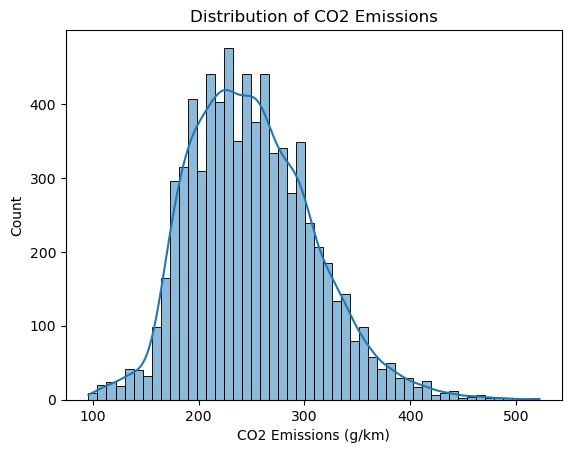

In [6]:
# Visualize the distribution of the target variable
sns.histplot(df['CO2 Emissions(g/km)'], bins=50, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.show()

As the distribution of the target variable CO2 emissions (g/km) appears to follow a normal distribution curve, it implies that the CO2 emissions values are evenly distributed around the mean value of the data, and there is no significant skewness or outliers in the data. This is a desirable property for a target variable in a regression problem, as it suggests that the regression model will be able to capture the underlying patterns in the data more accurately.

Let us visualize the relationship between target variable and numerical features

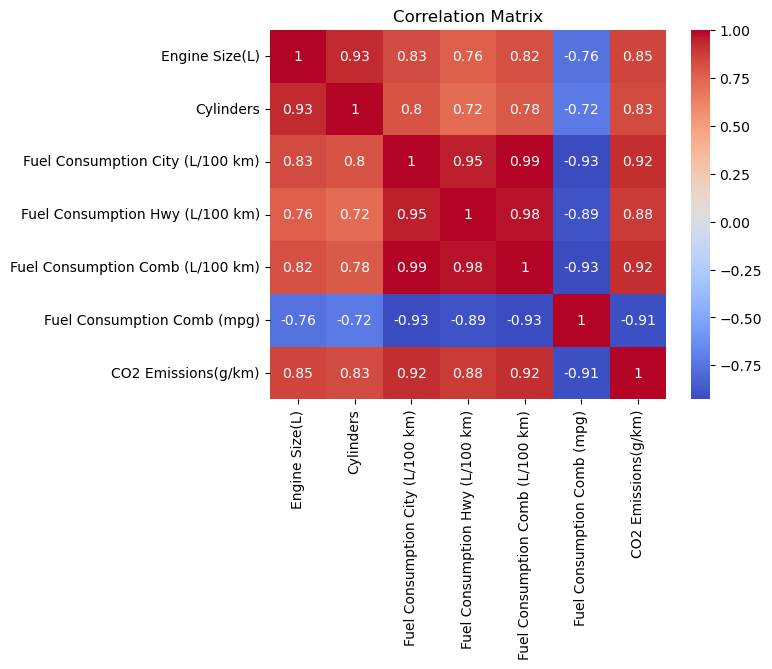

In [7]:
# Visualize the correlation matrix between numerical features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

After visualizing the relationship between the target variable (CO2 emissions) and other numerical features in the given dataset, we can observe the following:

<b><i>Fuel consumption</i></b>: There is a strong positive correlation between fuel consumption and CO2 emissions. As fuel consumption increases, CO2 emissions also tend to increase. This is true for all three types of fuel consumption: city, highway, and combined.

<b><i>Engine size and cylinders</i></b>: There is a positive correlation between engine size and cylinders with CO2 emissions, although not as strong as fuel consumption. This means that as engine size and number of cylinders increase, CO2 emissions tend to increase as well.

Overall, these relationships suggest that reducing fuel consumption is the most effective way to reduce CO2 emissions, followed by reducing engine size and number of cylinders.

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# Drop unnecessary columns
df.drop(['Model', 'Make'], axis=1, inplace=True)

In [9]:
# Encode categorical features
label_encoder = LabelEncoder()
df['Vehicle Class'] = label_encoder.fit_transform(df['Vehicle Class'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])

# Create feature matrix and target vector
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

# Train RandomForestRegressor and get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=12)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Print feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

1. Fuel Consumption Comb (L/100 km) (0.775506)
2. Fuel Consumption Comb (mpg) (0.147410)
3. Fuel Type (0.053812)
4. Fuel Consumption City (L/100 km) (0.017205)
5. Engine Size(L) (0.003896)
6. Fuel Consumption Hwy (L/100 km) (0.001294)
7. Transmission (0.000378)
8. Vehicle Class (0.000350)
9. Cylinders (0.000149)


Based on the feature importance score, the most important feature for predicting CO2 emissions is "Fuel Consumption Comb (L/100 km)", with a score of 0.775506. This feature is followed by "Fuel Consumption Comb (mpg)" with a score of 0.147410 and "Fuel Type" with a score of 0.053812. The rest of the features have relatively low importance scores, with "Fuel Consumption City (L/100 km)" having a score of 0.017205, "Engine Size(L)" having a score of 0.003896, "Fuel Consumption Hwy (L/100 km)" having a score of 0.001294, "Transmission" having a score of 0.000378, "Vehicle Class" having a score of 0.000350, and "Cylinders" having a score of 0.000149.

These results suggest that the fuel consumption of a vehicle, whether in liters per 100 kilometers or miles per gallon, is the most important factor affecting its CO2 emissions. This finding is consistent with prior knowledge about the relationship between fuel consumption and CO2 emissions, as a vehicle that consumes less fuel per distance traveled generally emits less CO2. The fuel type also plays a role, with different types of fuel resulting in different levels of CO2 emissions.

The correlation values we have above suggest that "Fuel Consumption Comb (L/100 km)" is the most important feature for predicting CO2 emissions, followed by "Fuel Consumption Comb (mpg)". However, the correlation values indicate that "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", and "Engine Size(L)" have a strong linear relationship with CO2 emissions. Therefore, it is essential to consider both correlation analysis and feature importance analysis together to get a comprehensive understanding of the relationship between the features and the target variable.

## Classification

In Canada, the definition of a low-emission vehicle (LEV) is based on a vehicle's tailpipe emissions of greenhouse gases (GHG), including carbon dioxide (CO2), nitrous oxide (N2O), and methane (CH4). The Canadian government has established a set of regulations for light-duty vehicles that require a gradual reduction of GHG emissions over time.

Currently, the Canadian government defines low-emission vehicles (LEV I and LEV II) as vehicles with tailpipe CO2 emissions below a certain threshold. For model year 2021, the threshold for LEV I is 125 grams of CO2 per kilometre (g/km), and for LEV II, it is 99 g/km.

Therefore, any vehicle with a CO2 emission level below 125 g/km can be considered a low-emission vehicle in Canada for model year 2021.

In Canada, the average CO2 emissions from new light-duty vehicles sold in 2020 was 187 grams per kilometre (g/km). Therefore, we can consider the range of CO2 emissions from 150 g/km to 224 g/km as average emissions in Canada. However, this is just an approximation and the exact range may vary based on different factors and regulations.

According to the Canadian government's Fuel Consumption Guide, vehicles emitting more than 400 grams of CO2 per kilometer are considered to have "very high" emissions and are rated as "Class G" vehicles, which are the most polluting. Therefore, it can be assumed that vehicles with CO2 emission values above 400 g/km can be considered as "pollutant" in Canada.

Therefore, for the purpose of quartile classification, the CO2 emission values can be classified as follows:

* Very High: Above 400 g/km
* High: Between 225 g/km to 400 g/km
* Average: Between 125 g/km to 224 g/km
* Low: Below 125 g/km


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Assign class labels based on quartiles
df['CO2 Class'] = pd.cut(df['CO2 Emissions(g/km)'], bins=[0, 125, 224, 400, float('inf')],
                            labels=['Low', 'Average', 'High', 'Very High'])

# Split the data into training and testing sets
X = df.drop(['CO2 Emissions(g/km)', 'CO2 Class'], axis=1)
y_class = df['CO2 Class']
y_regression = df['CO2 Emissions(g/km)']

X_train, X_test, y_train_class, y_test_class, y_train_regression, y_test_regression = train_test_split(
    X, y_class, y_regression, test_size=0.2, random_state=42)

In [11]:
# Classification task
classifier = LogisticRegression()
classifier.fit(X_train, y_train_class)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cm_train = confusion_matrix(y_train_class, y_train_pred)
cm_test = confusion_matrix(y_test_class, y_test_pred)
print("Confusion Matrix - Training:")
print(cm_train)
print("Confusion Matrix - Testing:")
print(cm_test)

# Accuracy
train_accuracy = accuracy_score(y_train_class, y_train_pred)
test_accuracy = accuracy_score(y_test_class, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test_class, y_test_pred, average='weighted')
recall = recall_score(y_test_class, y_test_pred, average='weighted')
f1 = f1_score(y_test_class, y_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix - Training:
[[1969  100    0    0]
 [  88 3623    0    5]
 [   0    0   43    0]
 [   0   16    0   64]]
Confusion Matrix - Testing:
[[504  22   0   0]
 [ 31 884   0   2]
 [  0   0  16   0]
 [  0   5   0  13]]
Training Accuracy: 0.9646242383209208
Testing Accuracy: 0.95937711577522
Precision: 0.9593389768198292
Recall: 0.95937711577522
F1-score: 0.9592472158743351


In [13]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt


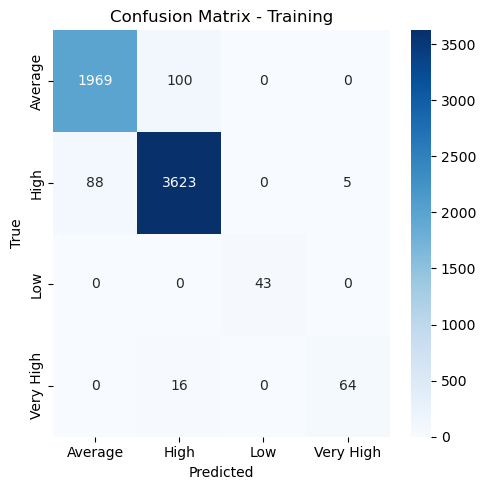

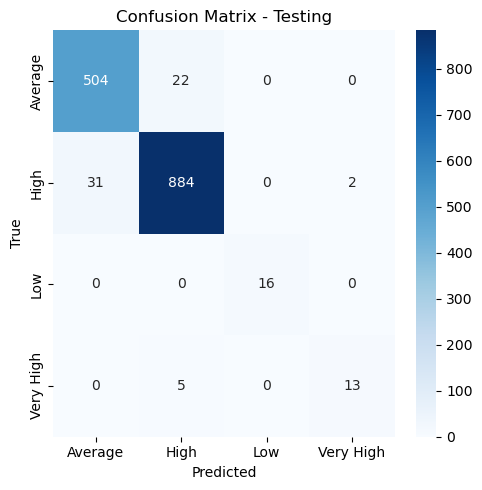

In [14]:
# Plotting confusion matrix
labels = ['Average', 'High', 'Low', 'Very High']
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training')
plt.tight_layout()
plt.show()

# Plotting confusion matrix
labels = ['Average', 'High', 'Low', 'Very High']
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Testing')
plt.tight_layout()
plt.show()

The overall accuracy of the classifier is high, both for training (0.9646) and testing (0.9594) data. This implies that the classifier is able to correctly classify the majority of instances in the dataset. The confusion matrix for both training and testing datasets indicates a relatively small number of misclassifications, further supporting the model's effectiveness.

The precision values indicate that the model has a high level of accuracy in classifying instances into their respective classes. The higher recall values also suggest that the model is effective in capturing instances of each class. 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification task
classifier = LogisticRegression(max_iter=1000, solver='lbfgs') 
classifier.fit(X_train_scaled, y_train_class)
y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Classification report
classification_report = classification_report(y_test_class, y_test_pred)
print("Classification Report:")
print(classification_report)

# Confusion matrix
confusion_matrix_train = confusion_matrix(y_train_class, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test_class, y_test_pred)
print("Confusion Matrix - Training:")
print(confusion_matrix_train)
print("Confusion Matrix-Testing:")
print(confusion_matrix_test)


# Training accuracy
train_accuracy = accuracy_score(y_train_class, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
test_accuracy = accuracy_score(y_test_class, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test_class, y_test_pred, average='weighted')
recall = recall_score(y_test_class, y_test_pred, average='weighted')
f1 = f1_score(y_test_class, y_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

     Average       0.95      0.95      0.95       526
        High       0.97      0.97      0.97       917
         Low       1.00      1.00      1.00        16
   Very High       0.83      0.83      0.83        18

    accuracy                           0.96      1477
   macro avg       0.94      0.94      0.94      1477
weighted avg       0.96      0.96      0.96      1477

Confusion Matrix - Training:
[[1960  109    0    0]
 [  94 3617    0    5]
 [   2    0   41    0]
 [   0   15    0   65]]
Confusion Matrix-Testing:
[[501  25   0   0]
 [ 28 886   0   3]
 [  0   0  16   0]
 [  0   3   0  15]]
Training Accuracy: 0.9619160460392688
Testing Accuracy: 0.960054163845633
Precision: 0.9600994491876912
Recall: 0.960054163845633
F1-score: 0.9600724585014586


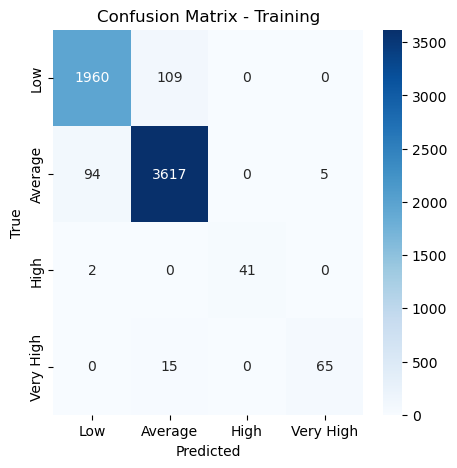

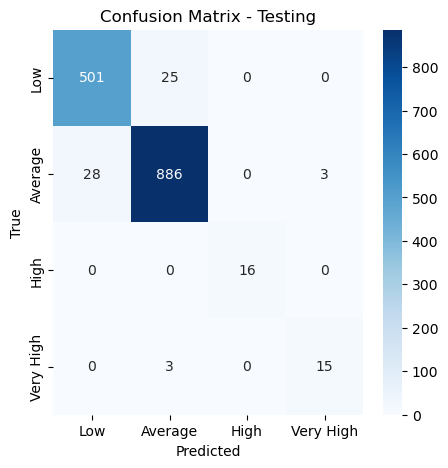

In [17]:
# Plotting confusion matrix
labels = ['Low', 'Average', 'High', 'Very High']
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training')
plt.show()

# Plotting confusion matrix
labels = ['Low', 'Average', 'High', 'Very High']
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Testing')
plt.show()

The training accuracy is approximately 96.19%, while the testing accuracy is around 96.01%. This indicates that the model is performing well on both the training and testing data. The weighted average precision, recall, and F1-score for the model are all around 96%, indicating a good overall performance. From the confusion matrix, we can see that the majority of instances are correctly classified. 

## Dividing Dataset into Subdatasets

Let us divide the dataset into four subdatasets based on the "CO2 Class" feature by iterating over the unique class labels in the "CO2 Class" column and create separate subdatasets for each class to apply different Regression techniques for each subdataset and find which model works best for which subdataset. 

In [18]:
# Create empty dictionaries to store the subdatasets
subdatasets = {}

# Iterate over the unique class labels
for class_label in df['CO2 Class'].unique():
    # Create a subdataset for the current class label
    subdatasets[class_label] = df[df['CO2 Class'] == class_label].copy()

# Access each subdataset using the class label
df_low = subdatasets['Low']f
df_avg = subdatasets['Average']
df_high = subdatasets['High']
df_vhigh = subdatasets['Very High']

In [19]:
df_low.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2 Class
487,2,2.0,4,19,3,4.7,4.9,4.8,59,110,Low
992,2,1.8,4,19,3,4.7,4.9,4.8,59,110,Low
993,0,1.5,4,19,3,4.6,4.9,4.7,60,108,Low
1047,0,1.4,4,9,4,5.6,5.2,5.4,52,124,Low
1569,2,2.0,4,19,3,4.7,5.3,5.0,56,115,Low


In [20]:
df_low.describe()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.338983,1.788136,4.0,15.423729,3.050847,4.740678,4.908475,4.810169,58.932203,112.542373
std,2.770598,0.329621,0.0,5.314922,0.221572,0.395282,0.394920,0.335639,4.475467,7.795494
min,0.000000,1.400000,4.0,8.000000,3.000000,4.200000,4.000000,4.100000,52.000000,96.000000
25%,1.000000,1.600000,4.0,8.000000,3.000000,4.500000,4.750000,4.700000,55.000000,108.000000
50%,2.000000,1.600000,4.0,19.000000,3.000000,4.600000,4.900000,4.800000,59.000000,114.000000
75%,2.000000,1.900000,4.0,19.000000,3.000000,4.900000,5.100000,5.100000,60.000000,120.000000
max,9.000000,2.500000,4.0,21.000000,4.000000,5.700000,5.500000,5.400000,69.000000,124.000000


In [21]:
df_avg.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2 Class
0,0,2.0,4,14,4,9.9,6.7,8.5,33,196,Average
1,0,2.4,4,25,4,11.2,7.7,9.6,29,221,Average
2,0,1.5,4,22,4,6.0,5.8,5.9,48,136,Average
9,0,2.4,4,14,4,10.6,7.5,9.2,31,212,Average
12,13,1.8,4,8,4,9.7,6.9,8.4,34,193,Average


In [22]:
df_avg.describe()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000
mean,5.005780,1.995414,4.088632,16.849711,3.183430,9.409094,7.092139,8.366513,34.281696,193.983815
std,4.757938,0.475958,0.526702,6.626196,0.777152,1.364121,0.832095,1.065546,4.545880,20.920669
min,0.000000,0.900000,3.000000,1.000000,0.000000,5.100000,4.500000,5.400000,20.000000,126.000000
25%,0.000000,1.600000,4.000000,15.000000,3.000000,8.600000,6.500000,7.700000,31.000000,180.000000
50%,2.000000,2.000000,4.000000,17.000000,3.000000,9.500000,7.100000,8.400000,34.000000,197.000000
75%,10.000000,2.000000,4.000000,24.000000,4.000000,10.300000,7.600000,9.100000,37.000000,211.000000
max,13.000000,3.600000,6.000000,25.000000,4.000000,16.800000,11.800000,14.000000,52.000000,224.000000


In [23]:
df_high.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2 Class
3,11,3.5,6,15,4,12.7,9.1,11.1,25,255,High
4,11,3.5,6,15,4,12.1,8.7,10.6,27,244,High
5,2,3.5,6,15,4,11.9,7.7,10.0,28,230,High
6,2,3.5,6,15,4,11.8,8.1,10.1,28,232,High
7,2,3.7,6,15,4,12.8,9.0,11.1,25,255,High


In [24]:
df_high.describe()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000
mean,7.056983,3.770883,6.410749,12.534859,3.305418,14.204144,10.056702,12.338247,23.540039,280.205698
std,4.638461,1.207393,1.672658,7.136539,0.938391,2.662334,1.799953,2.227375,3.750902,39.781107
min,0.000000,1.300000,4.000000,0.000000,0.000000,8.900000,7.000000,8.400000,12.000000,225.000000
25%,2.000000,3.000000,6.000000,5.000000,3.000000,12.200000,8.700000,10.600000,21.000000,248.000000
50%,7.000000,3.600000,6.000000,15.000000,4.000000,13.600000,9.600000,11.800000,24.000000,273.000000
75%,11.000000,4.700000,8.000000,17.000000,4.000000,15.700000,10.900000,13.500000,27.000000,305.000000
max,15.000000,8.400000,12.000000,26.000000,4.000000,26.700000,20.500000,23.900000,34.000000,400.000000


In [25]:
df_vhigh.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2 Class
46,13,4.2,8,25,4,21.2,13.4,17.7,16,407,Very High
48,13,5.2,10,25,4,21.1,13.8,17.8,16,409,Very High
50,13,4.2,8,25,4,21.2,13.4,17.7,16,407,Very High
52,13,5.2,10,25,4,21.1,13.8,17.8,16,409,Very High
75,2,6.8,8,17,4,22.3,14.9,19.0,15,437,Very High


In [26]:
df_vhigh.describe()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,12.030612,5.948980,9.387755,9.040816,3.428571,22.713265,15.169388,19.315306,14.826531,432.112245
std,4.327934,0.863969,2.213514,6.630014,0.861550,2.876769,2.035226,2.316608,1.506176,28.641720
min,0.000000,3.500000,6.000000,1.000000,1.000000,18.200000,12.700000,17.100000,11.000000,401.000000
25%,12.000000,5.500000,8.000000,3.000000,3.000000,20.900000,13.800000,17.900000,14.000000,413.000000
50%,13.000000,6.000000,8.000000,9.000000,4.000000,22.000000,14.900000,18.650000,15.000000,420.500000
75%,15.000000,6.500000,12.000000,16.000000,4.000000,23.750000,15.875000,19.700000,16.000000,444.000000
max,15.000000,8.000000,16.000000,26.000000,4.000000,30.600000,20.600000,26.100000,17.000000,522.000000


## Linear Regression

### Low Class

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separate the features and target variable
X_low = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y_low = df_low['CO2 Emissions(g/km)']  # Target variable

# Split the data into training and testing sets
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model_low = LinearRegression()

# Fit the model to the training data
regression_model_low.fit(X_low_train, y_low_train)

# Make predictions on training and testing data
y_low_train_pred = regression_model_low.predict(X_low_train)
y_low_test_pred = regression_model_low.predict(X_low_test)

# Calculate metrics for training data
mse_train = mean_squared_error(y_low_train, y_low_train_pred)
r2_train = r2_score(y_low_train, y_low_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_low_test, y_low_test_pred)
r2_test = r2_score(y_low_test, y_low_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2) Score:", r2_test)

Training Set:
Mean Squared Error (MSE): 1.3277816884128628
R-squared (R2) Score: 0.978234863834194

Testing Set:
Mean Squared Error (MSE): 0.8595602664156976
R-squared (R2) Score: 0.9813701567784677


The low values of MSE indicate that the model has good accuracy in predicting the target variable. The high R-squared score suggests that the model explains a significant portion of the variance in the target variable. Overall, the model performs well on both the training and testing data for the low CO2 class.

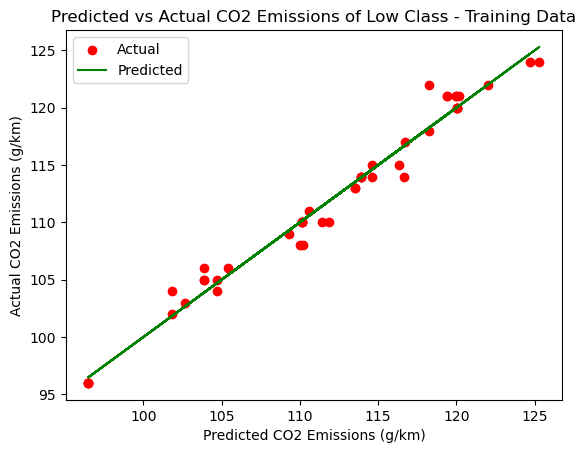

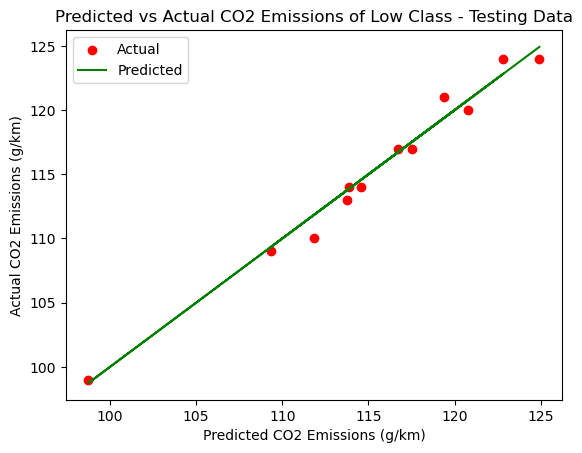

In [28]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for training data
plt.scatter(y_low_train_pred, y_low_train, color='red', label='Actual')
plt.plot(y_low_train_pred, y_low_train_pred, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Low Class - Training Data')
plt.legend()
plt.show()

# Plot predicted vs actual values for testing data
plt.scatter(y_low_test_pred, y_low_test, color='red', label='Actual')
plt.plot(y_low_test_pred, y_low_test_pred, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Low Class - Testing Data')
plt.legend()
plt.show()

### Average Class

In [29]:
# Separate the features and target variable
X_avg = df_avg.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y_avg = df_avg['CO2 Emissions(g/km)']  # Target variable

# Split the data into training and testing sets
X_avg_train, X_avg_test, y_avg_train, y_avg_test = train_test_split(X_avg, y_avg, test_size=0.3, random_state=10)

# Create a linear regression model
regression_model_avg = LinearRegression()

# Fit the model to the training data
regression_model_avg.fit(X_avg_train, y_avg_train)

# Make predictions on training and testing data
y_avg_train_pred = regression_model_avg.predict(X_avg_train)
y_avg_test_pred = regression_model_avg.predict(X_avg_test)

# Calculate metrics for training data
mse_train_avg = mean_squared_error(y_avg_train, y_avg_train_pred)
r2_train_avg = r2_score(y_avg_train, y_avg_train_pred)

# Calculate metrics for testing data
mse_test_avg = mean_squared_error(y_avg_test, y_avg_test_pred)
r2_test_avg = r2_score(y_avg_test, y_avg_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_avg)
print("R-squared (R2) Score:", r2_train_avg)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_avg)
print("R-squared (R2) Score:", r2_test_avg)

Training Set:
Mean Squared Error (MSE): 65.21511126944438
R-squared (R2) Score: 0.8477595653883695

Testing Set:
Mean Squared Error (MSE): 59.849915750685575
R-squared (R2) Score: 0.8695023884700319


The higher values of MSE indicate that the model has higher prediction errors on this particular subdataset compared to the previous ones. The R-squared score suggests that the model explains a moderate amount of variance in the target variable. Overall, these metrics indicate that the linear regression model on the "Average" CO2 class performs reasonably well in predicting the CO2 emissions.

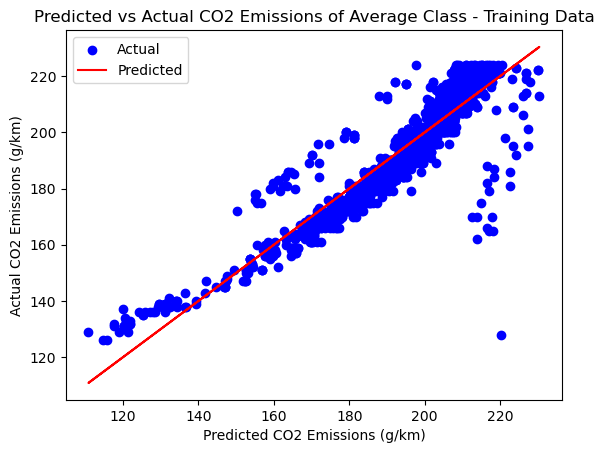

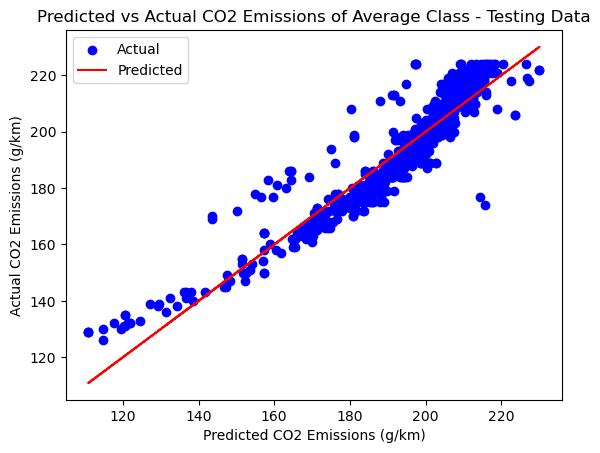

In [30]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for training data
plt.scatter(y_avg_train_pred, y_avg_train, color='blue', label='Actual')
plt.plot(y_avg_train_pred, y_avg_train_pred, color='red', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Average Class - Training Data')
plt.legend()
plt.show()

# Plot predicted vs actual values for testing data
plt.scatter(y_avg_test_pred, y_avg_test, color='blue', label='Actual')
plt.plot(y_avg_test_pred, y_avg_test_pred, color='red', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Average Class - Testing Data')
plt.legend()
plt.show()

### High Class

In [31]:
# Separate the features and target variable
X_high = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y_high = df_high['CO2 Emissions(g/km)']  # Target variable

# Split the data into training and testing sets
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=10)

# Create a linear regression model
regression_model_high = LinearRegression()

# Fit the model to the training data
regression_model_high.fit(X_high_train, y_high_train)

# Make predictions on training and testing data
y_high_train_pred = regression_model_high.predict(X_high_train)
y_high_test_pred = regression_model_high.predict(X_high_test)

# Calculate metrics for training data
mse_train_high = mean_squared_error(y_high_train, y_high_train_pred)
r2_train_high = r2_score(y_high_train, y_high_train_pred)

# Calculate metrics for testing data
mse_test_high = mean_squared_error(y_high_test, y_high_test_pred)
r2_test_high = r2_score(y_high_test, y_high_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_high)
print("R-squared (R2) Score:", r2_train_high)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_high)
print("R-squared (R2) Score:", r2_test_high)

Training Set:
Mean Squared Error (MSE): 284.15411637239686
R-squared (R2) Score: 0.8216362429372042

Testing Set:
Mean Squared Error (MSE): 269.75731263451263
R-squared (R2) Score: 0.8239811318717458


The mean squared error (MSE) for the training set is 284.15, which means that the model's predicted values are, on average, around 16.85 units away from the actual values. The R-squared (R2) score for the training set is 0.82, which means that 82% of the variability in the target variable is explained by the model's independent variables.

The mean squared error (MSE) for the testing set is 269.76, which means that the model's predicted values are, on average, around 16.42 units away from the actual values. The R-squared (R2) score for the testing set is 0.82, which means that the model generalizes well to new data and is not overfitting to the training data. Overall, these results indicate that the model is performing moderately in predicting CO2 emissions based on the given features.

In [36]:
from sklearn.linear_model import Lasso

# Separate the features and target variable
X_high = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y_high = df_high['CO2 Emissions(g/km)']  # Target variable

# Split the data into training and testing sets
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=10)

# Create a linear regression model with Lasso regularization
regression_model_high = Lasso(alpha=0.001)

# Fit the model to the training data
regression_model_high.fit(X_high_train, y_high_train)

# Make predictions on training and testing data
y_high_train_pred = regression_model_high.predict(X_high_train)
y_high_test_pred = regression_model_high.predict(X_high_test)

# Calculate metrics for training data
mse_train_high = mean_squared_error(y_high_train, y_high_train_pred)
r2_train_high = r2_score(y_high_train, y_high_train_pred)

# Calculate metrics for testing data
mse_test_high = mean_squared_error(y_high_test, y_high_test_pred)
r2_test_high = r2_score(y_high_test, y_high_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_high)
print("R-squared (R2) Score:", r2_train_high)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_high)
print("R-squared (R2) Score:", r2_test_high)

Training Set:
Mean Squared Error (MSE): 284.1548638200447
R-squared (R2) Score: 0.8216357737637416

Testing Set:
Mean Squared Error (MSE): 269.74516585459264
R-squared (R2) Score: 0.8239890577456805


In [40]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.01)

# Fit the model to the training data
ridge_model.fit(X_high_train, y_high_train)

# Make predictions on training and testing data
y_high_train_pred = ridge_model.predict(X_high_train)
y_high_test_pred = ridge_model.predict(X_high_test)

# Calculate metrics for training data
mse_train_high = mean_squared_error(y_high_train, y_high_train_pred)
r2_train_high = r2_score(y_high_train, y_high_train_pred)

# Calculate metrics for testing data
mse_test_high = mean_squared_error(y_high_test, y_high_test_pred)
r2_test_high = r2_score(y_high_test, y_high_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_high)
print("R-squared (R2) Score:", r2_train_high)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_high)
print("R-squared (R2) Score:", r2_test_high)

Training Set:
Mean Squared Error (MSE): 284.1541163829411
R-squared (R2) Score: 0.8216362429305856

Testing Set:
Mean Squared Error (MSE): 269.75729526467603
R-squared (R2) Score: 0.8239811432057073


The performance of the linear regression model does not improve after applying Lasso and Ridge regression as well.

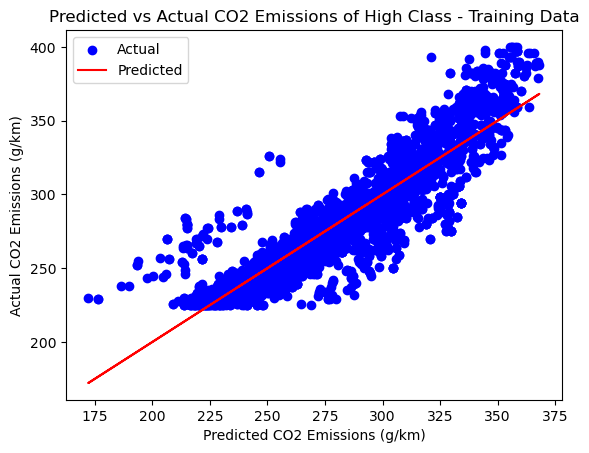

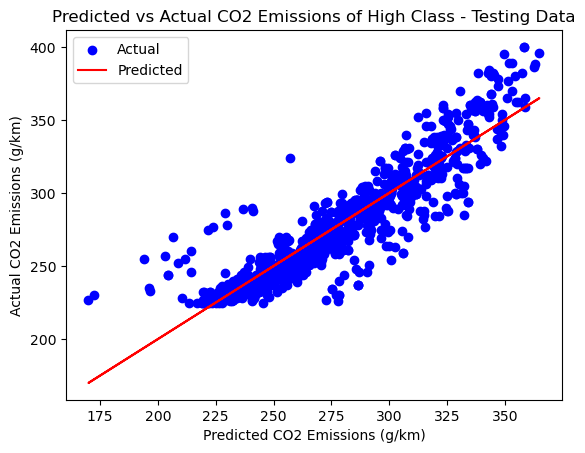

In [41]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for training data
plt.scatter(y_high_train_pred, y_high_train, color='blue', label='Actual')
plt.plot(y_high_train_pred, y_high_train_pred, color='red', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of High Class - Training Data')
plt.legend()
plt.show()

# Plot predicted vs actual values for testing data
plt.scatter(y_high_test_pred, y_high_test, color='blue', label='Actual')
plt.plot(y_high_test_pred, y_high_test_pred, color='red', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of High Class - Testing Data')
plt.legend()
plt.show()

### Very High Dataset

In [42]:
# Separate the features and target variable
X_vhigh = df_vhigh.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y_vhigh = df_vhigh['CO2 Emissions(g/km)']  # Target variable

# Split the data into training and testing sets
X_vhigh_train, X_vhigh_test, y_vhigh_train, y_vhigh_test = train_test_split(X_vhigh, y_vhigh, test_size=0.2, random_state=10)

# Create a linear regression model
regression_model_vhigh = LinearRegression()

# Fit the model to the training data
regression_model_vhigh.fit(X_vhigh_train, y_vhigh_train)

# Make predictions on training and testing data
y_vhigh_train_pred = regression_model_vhigh.predict(X_vhigh_train)
y_vhigh_test_pred = regression_model_vhigh.predict(X_vhigh_test)

# Calculate metrics for training data
mse_train_vhigh = mean_squared_error(y_vhigh_train, y_vhigh_train_pred)
r2_train_vhigh = r2_score(y_vhigh_train, y_vhigh_train_pred)

# Calculate metrics for testing data
mse_test_vhigh = mean_squared_error(y_vhigh_test, y_vhigh_test_pred)
r2_test_vhigh = r2_score(y_vhigh_test, y_vhigh_test_pred)

# Print the metrics
print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_vhigh)
print("R-squared (R2) Score:", r2_train_vhigh)
print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_vhigh)
print("R-squared (R2) Score:", r2_test_vhigh)

Training Set:
Mean Squared Error (MSE): 179.0082451760012
R-squared (R2) Score: 0.775651719609745

Testing Set:
Mean Squared Error (MSE): 244.53518710183138
R-squared (R2) Score: 0.716325538220264


The linear regression model shows a moderate fit on both the training and testing data as indicated by the R-squared scores of 0.78 and 0.72 respectively. The mean squared error (MSE) is relatively low for both the training and testing data, indicating that the model's predictions are reasonably close to the actual values. However, the MSE for the testing data is slightly higher than that for the training data, which suggests that the model may be slightly overfitting on the training data. Overall, the model seems to be performing well in predicting CO2 emissions based on the given features.

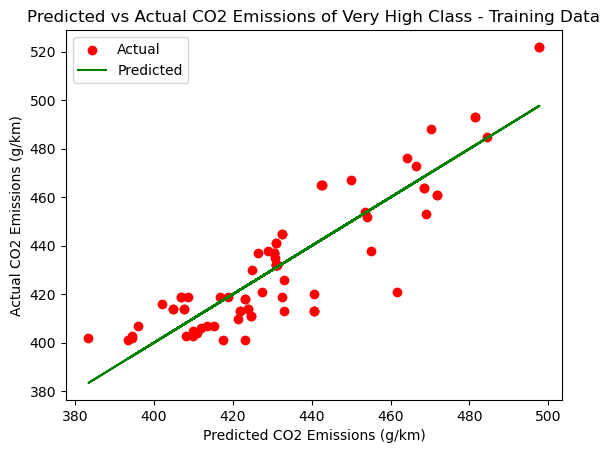

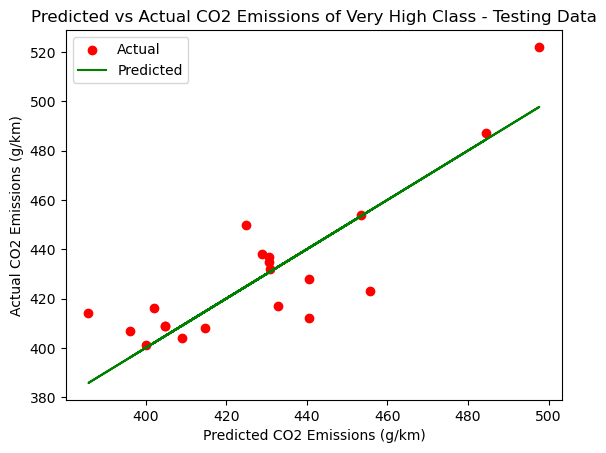

In [43]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for training data
plt.scatter(y_vhigh_train_pred, y_vhigh_train, color='red', label='Actual')
plt.plot(y_vhigh_train_pred, y_vhigh_train_pred, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Very High Class - Training Data')
plt.legend()
plt.show()

# Plot predicted vs actual values for testing data
plt.scatter(y_vhigh_test_pred, y_vhigh_test, color='red', label='Actual')
plt.plot(y_vhigh_test_pred, y_vhigh_test_pred, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Very High Class - Testing Data')
plt.legend()
plt.show()

## Polynomial Regression

### Low Dataset

In [44]:
from sklearn.preprocessing import PolynomialFeatures

X1 = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y1 = df_low['CO2 Emissions(g/km)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)
model_1 = LinearRegression()
model_1.fit(X1_train_poly, y1_train)
y_train_pred1 = model_1.predict(X1_train_poly)
y_test_pred1 = model_1.predict(X1_test_poly)
train_mse = mean_squared_error(y1_train, y_train_pred1)
train_r2 = r2_score(y1_train, y_train_pred1)
n = len(y1_train)
k = X_train.shape[1]
print("\nTraining set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)
test_mse = mean_squared_error(y1_test, y_test_pred1)
test_r2 = r2_score(y1_test, y_test_pred1)
n = len(y1_test)
k = X_test.shape[1]
print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)


Training set performance:
MSE:  1.0000085618141071e-22
R-squared score:  1.0

Testing set performance:
MSE:  8.076423549065579
R-squared score:  0.6744106967901895


The polynomial regression model we built seems to have a perfect fit for the training data, as evidenced by the mean squared error (MSE) of 1.00 and an R-squared score of 1.0. However, the testing set performance shows that the model is overfitting to the training data and not generalizing well to new data. The testing MSE is 8.07, which is higher than the training MSE, and the R-squared score is 0.67, which is lower than the training R-squared score. This suggests that the model is performing well on the training data but is not able to generalize well to new data. To improve the model's performance on the testing set, we can try using a different degree of polynomial or using regularization techniques like ridge or lasso regression.

Let me apply Lasso Regression to the above model.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

X1 = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y1 = df_low['CO2 Emissions(g/km)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Lasso regression
lasso = Lasso(alpha=0.01, max_iter=10000)
model_1 = make_pipeline(poly, lasso)
model_1.fit(X1_train, y1_train)

y_train_pred1 = model_1.predict(X1_train)
y_test_pred1 = model_1.predict(X1_test)

train_mse = mean_squared_error(y1_train, y_train_pred1)
train_r2 = r2_score(y1_train, y_train_pred1)
print("\nTraining set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)

test_mse = mean_squared_error(y1_test, y_test_pred1)
test_r2 = r2_score(y1_test, y_test_pred1)
print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)


Training set performance:
MSE:  0.9138933402708229
R-squared score:  0.9866580946081062

Testing set performance:
MSE:  2.084260800895491
R-squared score:  0.9159760483401593


This output shows the performance of a model after applying Lasso regression. Here, Lasso regression is used for regularization to prevent overfitting.

The training set performance shows that the mean squared error (MSE) is 0.91, which is low, and the R-squared score is 0.98, which is close to 1.0. This indicates that the model is performing very well on the training data, and the model is able to explain a high percentage of the variance in the data.

The testing set performance shows that the MSE is 2.08, which is slightly higher than the training set MSE, and the R-squared score is 0.91, which is lower than the training set R-squared score. However, the R-squared score is still relatively high, indicating that the model is able to explain a significant percentage of the variance in the testing data.

Overall, this output suggests that the Lasso regression model is performing well and is able to generalize to new data.

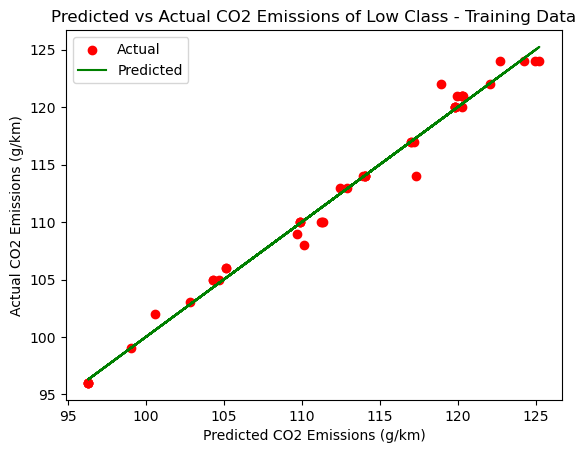

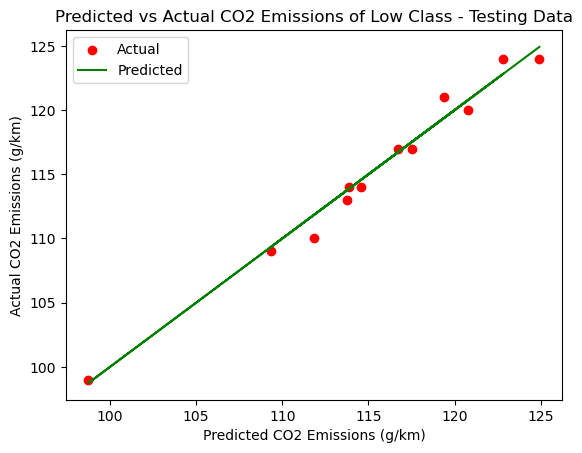

In [46]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for training data
plt.scatter(y_train_pred1, y1_train, color='red', label='Actual')
plt.plot(y_train_pred1, y_train_pred1, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Low Class - Training Data')
plt.legend()
plt.show()

# Plot predicted vs actual values for testing data
plt.scatter(y_low_test_pred, y_low_test, color='red', label='Actual')
plt.plot(y_low_test_pred, y_low_test_pred, color='green', label='Predicted')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Actual CO2 Emissions (g/km)')
plt.title('Predicted vs Actual CO2 Emissions of Low Class - Testing Data')
plt.legend()
plt.show()

### Average Dataset

In [47]:
X2 = df_avg.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y2 = df_avg['CO2 Emissions(g/km)']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
X2_train_poly = poly.fit_transform(X2_train)
X2_test_poly = poly.transform(X2_test)
model_2 = LinearRegression()
model_2.fit(X2_train_poly, y2_train)
y_train_pred2 = model_2.predict(X2_train_poly)
y_test_pred2 = model_2.predict(X2_test_poly)
train_mse = mean_squared_error(y2_train, y_train_pred2)
train_r2 = r2_score(y2_train, y_train_pred2)
n = len(y2_train)
k = X_train.shape[1]
print("Training set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)
test_mse = mean_squared_error(y2_test, y_test_pred2)
test_r2 = r2_score(y2_test, y_test_pred2)
n = len(y2_test)
k = X_test.shape[1]
print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)

Training set performance:
MSE:  12.008774879829271
R-squared score:  0.9727011073946481

Testing set performance:
MSE:  14.874433653890435
R-squared score:  0.9652222554082805


Based on the output, the polynomial regression model on the average CO2 dataset has a relatively good performance, as the R-squared scores for both the training and testing sets are high (>0.9). The MSE scores for both sets are also relatively low, but they are higher than the MSE scores for the low CO2 dataset, indicating that the model might not fit the average CO2 data as well as the low CO2 data. Nonetheless, the performance of the model on both sets is acceptable.

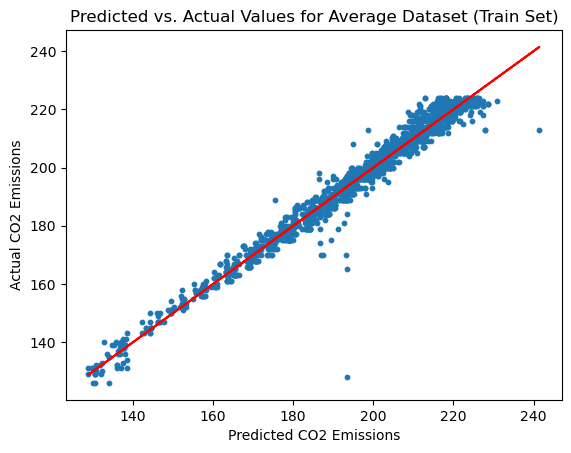

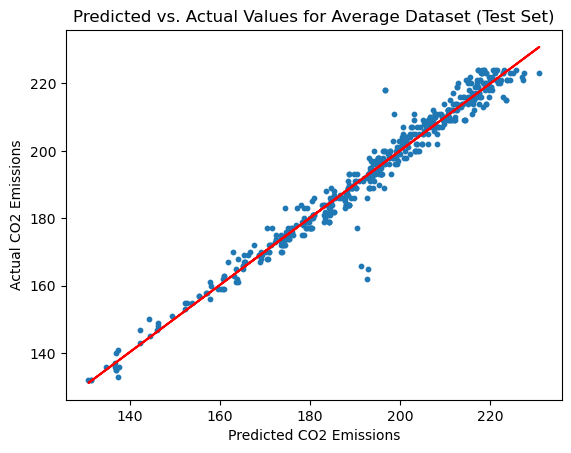

In [48]:
# Plot predicted vs. actual values for train set
plt.scatter(y_train_pred2, y2_train, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for Average Dataset (Train Set)")
m, b = np.polyfit(y_train_pred2, y2_train, 1)
plt.plot(y_train_pred2, m * y_train_pred2 + b, color='red')
plt.show()

# Plot predicted vs. actual values for train set
plt.scatter(y_test_pred2, y2_test, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for Average Dataset (Test Set)")
m, b = np.polyfit(y_test_pred2, y2_test, 1)
plt.plot(y_test_pred2, m * y_test_pred2 + b, color='red')
plt.show()

### High Dataset

In [49]:
X3 = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y3 = df_high['CO2 Emissions(g/km)']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
X3_train_poly = poly.fit_transform(X3_train)
X3_test_poly = poly.transform(X3_test)
model_3 = LinearRegression()
model_3.fit(X3_train_poly, y3_train)
y_train_pred3 = model_3.predict(X3_train_poly)
y_test_pred3 = model_3.predict(X3_test_poly)
train_mse = mean_squared_error(y3_train, y_train_pred3)
train_r2 = r2_score(y3_train, y_train_pred3)
n = len(y3_train)
k = X_train.shape[1]
print("Training set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)
test_mse = mean_squared_error(y3_test, y_test_pred3)
test_r2 = r2_score(y3_test, y_test_pred3)
n = len(y3_test)
k = X_test.shape[1]
print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)

Training set performance:
MSE:  38.50272942402895
R-squared score:  0.9753939386736717

Testing set performance:
MSE:  44.523952447981024
R-squared score:  0.9730323213040046


The model's performance on the training set seems to be good, with an MSE of 38.50 and an R-squared score of 0.975. The R-squared score indicates that the model explains 97.5% of the variance in the training set's CO2 emissions.

The model's performance on the testing set is also decent, with an MSE of 44.52 and an R-squared score of 0.973. The R-squared score suggests that the model explains 97.3% of the variance in the testing set's CO2 emissions.

Overall, the model seems to be performing well on both the training and testing sets. However, it is worth noting that the MSE is relatively high for both the training and testing sets, which means that there may still be some room for improvement.

In [50]:
from sklearn.linear_model import Lasso

X3 = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y3 = df_high['CO2 Emissions(g/km)']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=3)
X3_train_poly = poly.fit_transform(X3_train)
X3_test_poly = poly.transform(X3_test)

lasso = Lasso(alpha=0.001, max_iter=45000)
lasso.fit(X3_train_poly, y3_train)

y_train_pred3 = lasso.predict(X3_train_poly)
y_test_pred3 = lasso.predict(X3_test_poly)

train_mse = mean_squared_error(y3_train, y_train_pred3)
train_r2 = r2_score(y3_train, y_train_pred3)

print("Training set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)

test_mse = mean_squared_error(y3_test, y_test_pred3)
test_r2 = r2_score(y3_test, y_test_pred3)

print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)

Training set performance:
MSE:  9.421299342343785
R-squared score:  0.993979100368746

Testing set performance:
MSE:  12.091209624744417
R-squared score:  0.9926764844925438


Using the Lasso regressor, and changing the degree to 3 has  improved the model's performance on both the training and testing sets compared to the previous models. The lower MSE and higher R-squared scores suggest that the model is fitting the data better and capturing more of the variance in the target variable.

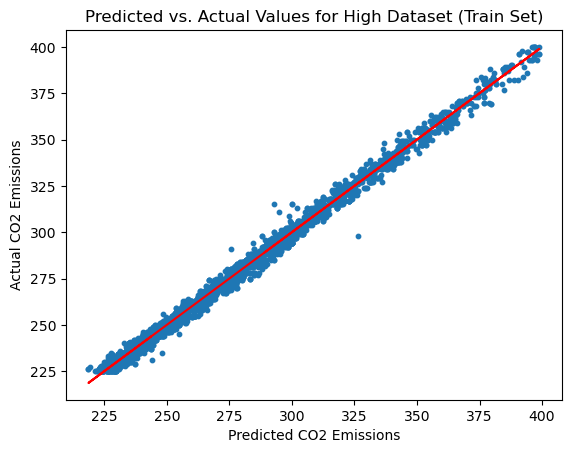

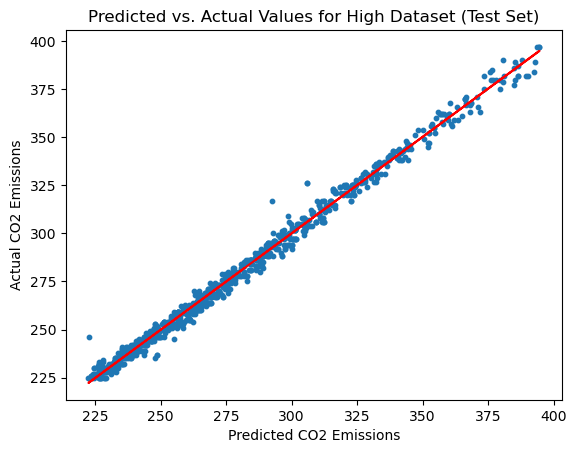

In [51]:
# Plot predicted vs. actual values for train set
plt.scatter(y_train_pred3, y3_train, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for High Dataset (Train Set)")
m, b = np.polyfit(y_train_pred3, y3_train, 1)
plt.plot(y_train_pred3, m * y_train_pred3 + b, color='red')
plt.show()

# Plot predicted vs. actual values for train set
plt.scatter(y_test_pred3, y3_test, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for High Dataset (Test Set)")
m, b = np.polyfit(y_test_pred3, y3_test, 1)
plt.plot(y_test_pred3, m * y_test_pred3 + b, color='red')
plt.show()

### Very High Dataset

In [52]:
X4 = df_vhigh.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y4 = df_vhigh['CO2 Emissions(g/km)']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=2)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

model_4 = LinearRegression()
model_4.fit(X4_train_poly, y4_train)

y_train_pred4 = model_4.predict(X4_train_poly)
y_test_pred4 = model_4.predict(X4_test_poly)

train_mse = mean_squared_error(y4_train, y_train_pred4)
train_r2 = r2_score(y4_train, y_train_pred4)
n = len(y4_train)
k = X_train.shape[1]

print("Training set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)

test_mse = mean_squared_error(y4_test, y_test_pred4)
test_r2 = r2_score(y4_test, y_test_pred4)
n = len(y4_test)
k = X_test.shape[1]

print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)

Training set performance:
MSE:  2.7667358042433476
R-squared score:  0.9968839148958866

Testing set performance:
MSE:  87315.28138243438
R-squared score:  -176.26831529648035


The large MSE and negative R-squared score for the testing set suggest that the model is overfitting to the training data and performing poorly on unseen data. We can consider using regularization techniques like Lasso or Ridge regression to address overfitting. 

In [53]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X4 = df_vhigh.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y4 = df_vhigh['CO2 Emissions(g/km)']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

degree = 3
alpha = 0.01

model_4 = make_pipeline(PolynomialFeatures(degree),
                        Lasso(alpha=alpha))
model_4.fit(X4_train, y4_train)

y_train_pred4 = model_4.predict(X4_train)
y_test_pred4 = model_4.predict(X4_test)

train_mse = mean_squared_error(y4_train, y_train_pred4)
train_r2 = r2_score(y4_train, y_train_pred4)
n = len(y4_train)
k = X4_train.shape[1]

print("Training set performance:")
print("MSE: ", train_mse)
print("R-squared score: ", train_r2)

test_mse = mean_squared_error(y4_test, y_test_pred4)
test_r2 = r2_score(y4_test, y_test_pred4)
n = len(y4_test)
k = X4_test.shape[1]

print("\nTesting set performance:")
print("MSE: ", test_mse)
print("R-squared score: ", test_r2)

Training set performance:
MSE:  7.950360968833386
R-squared score:  0.9910457654289541

Testing set performance:
MSE:  34.40281473163061
R-squared score:  0.9301550780988497


Using the Lasso regressor, and changing the degree to 3 has improved the model's performance on testing sets compared to the previous model. However, the MSE for training set has been comprimised and it increased a little. The lower MSE and higher R-squared scores suggest that the model is fitting the data better and capturing more of the variance in the target variable.

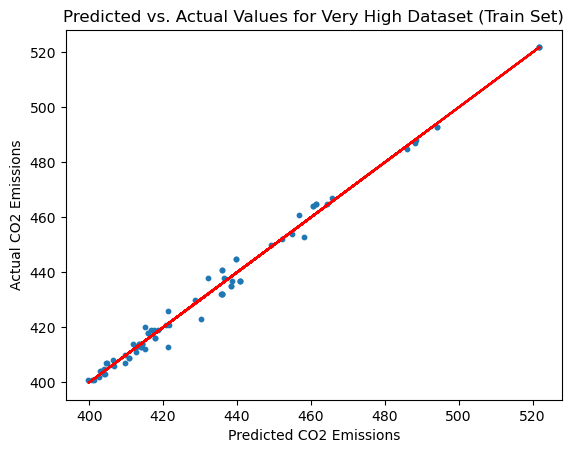

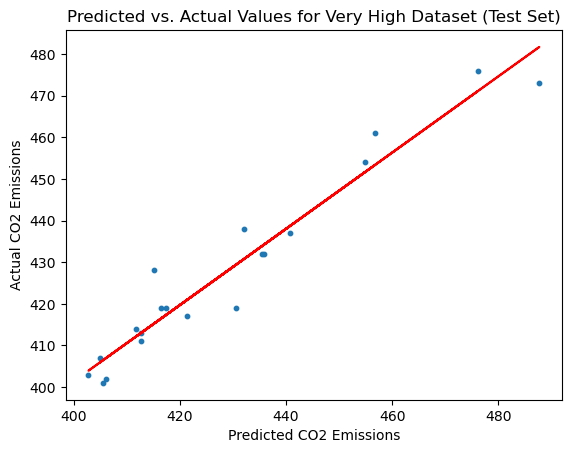

In [54]:
# Plot predicted vs. actual values for train set
plt.scatter(y_train_pred4, y4_train, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for Very High Dataset (Train Set)")
m, b = np.polyfit(y_train_pred4, y4_train, 1)
plt.plot(y_train_pred4, m * y_train_pred4 + b, color='red')
plt.show()

# Plot predicted vs. actual values for train set
plt.scatter(y_test_pred4, y4_test, s=10)
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Actual CO2 Emissions")
plt.title("Predicted vs. Actual Values for Very High Dataset (Test Set)")
m, b = np.polyfit(y_test_pred4, y4_test, 1)
plt.plot(y_test_pred4, m * y_test_pred4 + b, color='red')
plt.show()

## Tree Regression

### Low Dataset

### Decision Tree Regressor

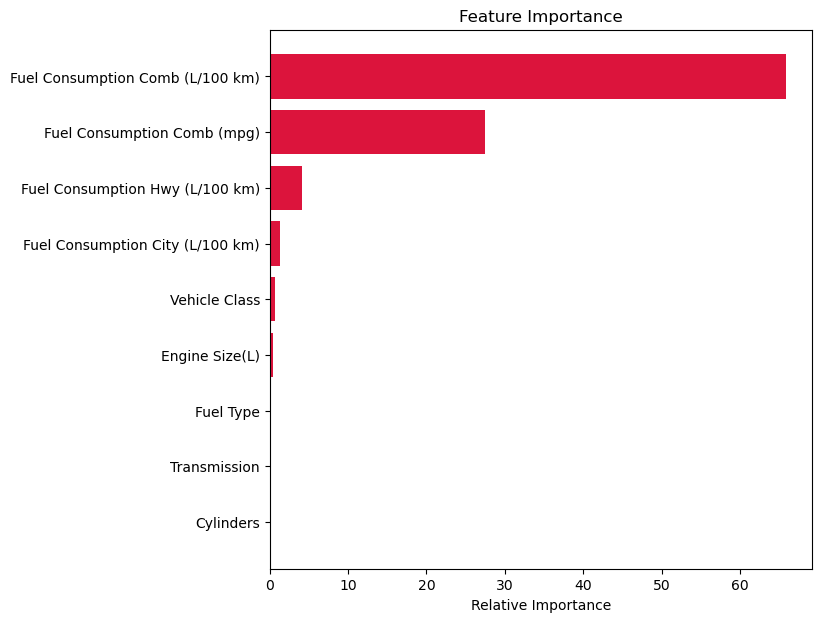

In [55]:
# Defining the features and the target
X = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y = df_low['CO2 Emissions(g/km)']  # Target variable

# Importing 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor, export_graphviz
tr_reg = DecisionTreeRegressor()  # Instantiating the tree regressor
tr_reg.fit(X, y)                  # Fitting the data

# Calculating the feature importance

feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying feature importance through bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-2][sorted_idx])
plt.show()

In [56]:
# Defining the features and the target of the model

X = df_low[['Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']].values # Features 
y = df_low[['CO2 Emissions(g/km)']].values # Target 

# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Constructing a tree regressor

tr_reg = DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test
mse_train = mean_squared_error(y_train, train_y_pred)
mse_test = mean_squared_error(y_test, test_y_pred)

print('MSE for train dataset = ',round(mse_train,4))
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('MSE for test dataset = ',round(mse_test,4))
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

MSE for train dataset =  0.0244
R^2 score for train dataset =  0.9996 

MSE for test dataset =  1.9167
R^2 score for test dataset =  0.968 



Out of the 59 samples we have, we got 20 classes which is resulting in a deeper tree that can cause overfitting. Let us adjust the hyperparameters such as min_samples_split and min_samples_leaf to control the complexity of the model.

In [60]:
# Using 'GridSearchCV' to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 41)), 'min_samples_split': [2, 3, 4],'max_depth': [2,4,5,6,7,8,9,10]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 936 candidates, totalling 2808 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=3),
             param_grid={'max_depth': [2, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [61]:
# Displaying the best parameters

grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=14, random_state=3)

In [62]:
# Retraining the tree regressor with the best hyperparameters

tr_reg = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=14, random_state=3)
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=14, random_state=3)

In [63]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9981 

R^2 score for test dataset =  0.9329 



In [66]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

Mean Squared Error train and test: 1.6656481481481495 0.12836879432624115


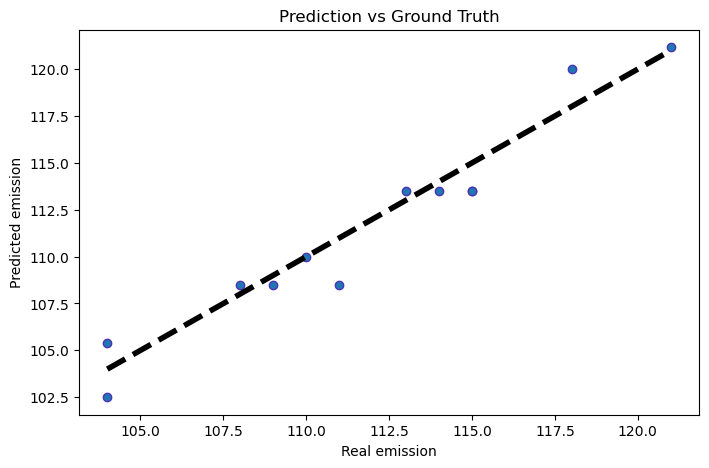

In [67]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

When compared to the previous model, the MSE for both train and test sets have decreased a bit which can be a good sign. However, the R2 score for test set has been comprimised a bit compared to earlier. Overall, the model is performing well in predicting the target variable values. Let us go ahead and check the Bagged Regressor to see if it can perform any better than this.

### Bagged Regressor

Let us consider Linear Regression as base estimator and build a Bagged regressor.

In [68]:
# Importing BaggingRegressor from ensemble module
# Performing Linear Regression as base estimator 

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9811 

R^2 score for test dataset =  0.9314 

Mean Squared Error train and test: 1.7007208707934929 1.2937260296670892


It looks like the bagged regressor with linear regression as base estimator is performing well on the low co2 dataset. The R^2 score for the test dataset is 0.9314, which indicates that the model is able to explain a significant amount of the variability in the target variable using the selected features. The mean squared error for the train and test datasets also seem to be reasonable, indicating that the model is not overfitting to the training data.

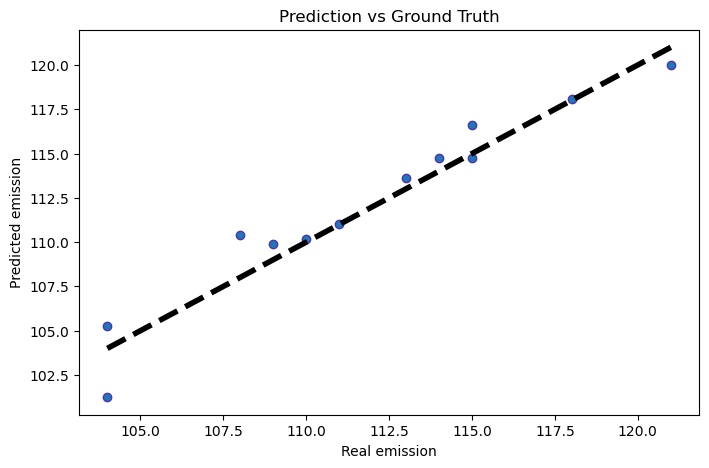

In [69]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

Let us build a Bagged Regressor with Polynomial regression as based estimator.

In [70]:
# performing Polynomial regression as based estimator 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Instantiate the polynomial features transformer
poly_transformer = PolynomialFeatures(degree=2)

# Transform the X_train and X_test data using the polynomial transformer
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Instantiate the bagged tree regressor with polynomial features
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000, max_features=3, random_state=3)

# Fit the bagged tree regressor to the training data
bag_reg.fit(X_train_poly, y_train)

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train_poly)
test_y_pred = bag_reg.predict(X_test_poly)
r2_train_score = bag_reg.score(X_train_poly, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test_poly, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9756 

R^2 score for test dataset =  0.9239 

Mean Squared Error train and test: 1.888530908213844 1.6709625823319287


It looks like the bagged regressor with polynomial regression as the base estimator has slightly lower performance compared to the bagged regressor with linear regression as the base estimator.

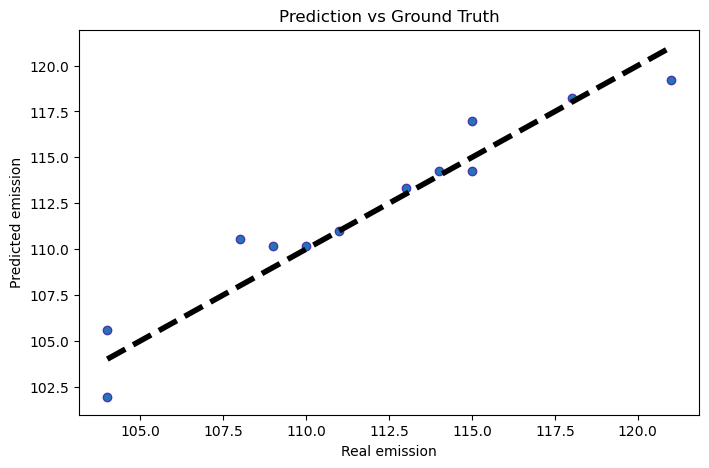

In [71]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

Let us try again by using Decision Tree as the base estimator now.

In [72]:
# Decison Tree as base estimator

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=1000,max_features=3, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=3,
                 n_estimators=1000, random_state=3)

In [73]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9972 

R^2 score for test dataset =  0.9496 

Mean Squared Error train and test: 1.2511776462408766 0.19366445437167093


It seems like the bagged regressor with decision tree regression as base estimator is performing better compared to the other two models in terms of the R-squared score for the test dataset and mean squared error for both the train and test datasets. This is likely due to the decision tree being able to capture non-linear relationships between the features and target variable.

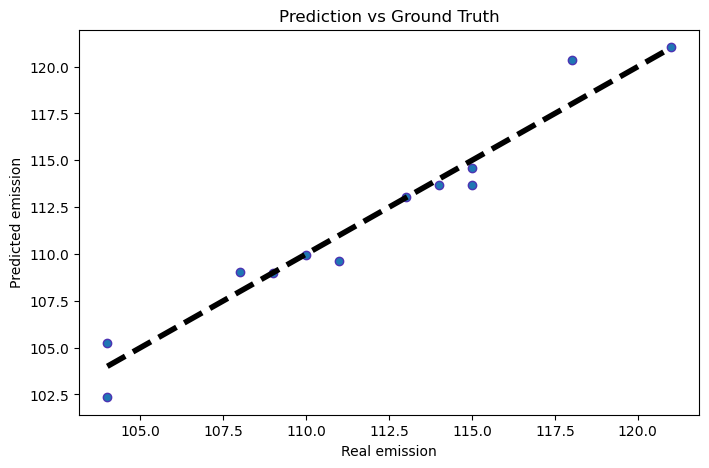

In [74]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### Random Forest Regressor

In [75]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)  # Instantiating the forest
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=3)

In [76]:
# Finding the predictions of random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9975 

R^2 score for test dataset =  0.955 

Mean Squared Error train and test: 1.1165976666666664 0.17315014893616934


It seems like all our model is performing well on both the train and test datasets, with high R-squared scores and relatively low mean squared errors.

### XGBoost

In [77]:
# Importing 'xgboost'

import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor()  

xgb_reg.fit(X_train, y_train)  # Fitting the train data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.8753 

Mean Squared Error train and test: 3.094070023226474 2.729685412363169e-06


The perfect R^2 score of 1.0 on the training set for XGBoost may indicate that the model is overfitting on the training data. The lower R^2 score on the test set compared to the other models suggests that XGBoost may not generalize as well to new data.

The very small test MSE indicates that the model is able to make very accurate predictions on the test set. However, it's important to keep in mind that a very small test MSE may also indicate overfitting on the test data.

In [69]:
from sklearn.model_selection import GridSearchCV

# create XGBRegressor object
xgb_reg = xgb.XGBRegressor()

# define hyperparameters to search over
params = {
    'n_estimators': [100, 500, 700],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 700, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}
Best score:  -1.0518091997205434


In [79]:
# Retraining the XGBoost regressor with the best hyperparameters
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.6, learning_rate=0.01, max_depth=8, n_estimators=700, reg_alpha=0.1, reg_lambda=0, subsample=0.8)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9992 

R^2 score for test dataset =  0.9102 

Mean Squared Error train and test: 2.2268013865153384 0.05440742982194779


 The R-squared score for the training set has improved to 0.9992 and for the testing set has decreased slightly to 0.9102 compared to the previous output. However, the mean squared error for both the training and testing sets has decreased significantly to 2.2268013865153384 and 0.05440742982194779, respectively, indicating better performance of the model.

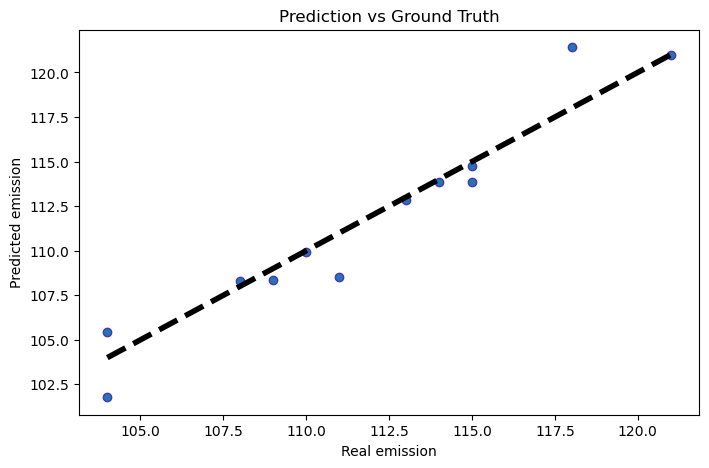

In [81]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### Average Dataset

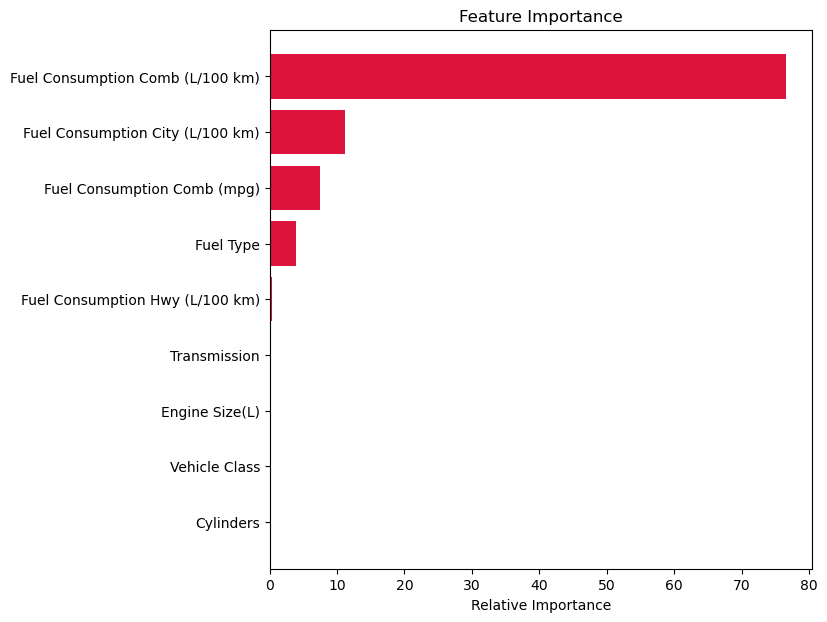

In [34]:
X = df_avg.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y = df_avg['CO2 Emissions(g/km)']  # Target variable
# Importing 'DecisionTreeRegressor'

from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor()  # Instantiating the tree regressor
tr_reg.fit(X, y)                  # Fitting the data

# Calculating the feature importance

feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying feature importance through bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-2][sorted_idx])
plt.show()

In [35]:
# Defining the features and the target of the model

X = df_avg[['Fuel Consumption Comb (L/100 km)', 'Fuel Consumption City (L/100 km)', 'Fuel Type', 'Fuel Consumption Comb (mpg)','Fuel Consumption Hwy (L/100 km)']].values # Features 
y = df_avg[['CO2 Emissions(g/km)']].values # Target 

# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Random Forest Regression

In [36]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)  # Instantiating the forest
rf_reg.fit(X_train, y_train)     

RandomForestRegressor(n_estimators=1000, random_state=3)

In [37]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9966 

R^2 score for test dataset =  0.9781 

Mean Squared Error train and test: 10.474330187352422 1.8648530099700018


In [38]:
# Retraining the random forest regressor with the best hyperparameters
rf_reg = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=1000)

In [39]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9955 

R^2 score for test dataset =  0.9782 

Mean Squared Error train and test: 10.467966201388872 1.8685277346637952


It seems like the hyperparameter tuning did not result in any significant improvement in the performance of the random forest regressor on the average CO2 dataset. The R-squared scores and mean squared errors for the train and test datasets are very similar before and after the hyperparameter tuning. However, it is worth noting that the R-squared score for the test dataset did increase slightly from 0.9781 to 0.9782, which could be an indication of a slightly better generalization performance of the model.

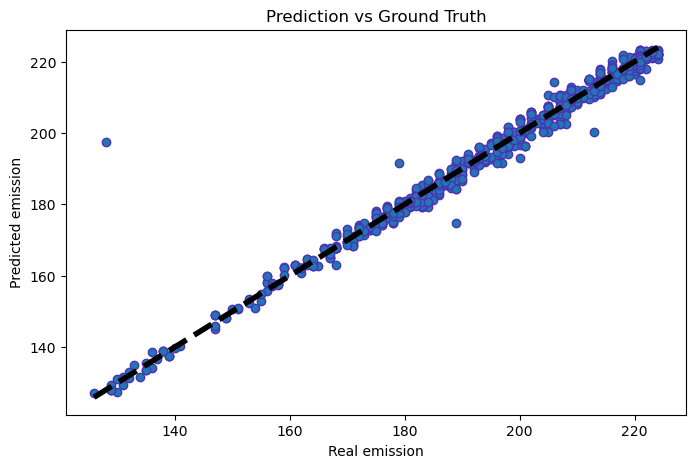

In [40]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### XGBoost Regression

In [41]:
# Importing 'xgboost'

import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor()  

xgb_reg.fit(X_train, y_train)  # Fitting the train data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9962 

R^2 score for test dataset =  0.9777 

Mean Squared Error train and test: 10.695934038070977 1.5728564124694402


In [43]:
# Retraining the XGBoost regressor with the best hyperparameters
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.5, max_depth=4, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.6)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_train = mean_squared_error(y_test, test_y_pred)
mse_test  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9946 

R^2 score for test dataset =  0.9787 

Mean Squared Error train and test: 10.196945293447534 2.252653531341953


XGBoost model has a good performance with an R^2 score of 0.9787 on the test dataset. The mean squared error for the test dataset is also reasonably low. It seems that the model is generalizing well to new data. 

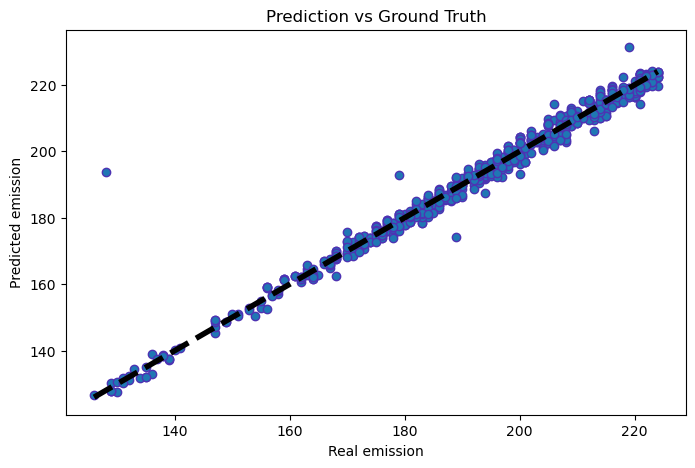

In [45]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### High Dataset

### Random Forest

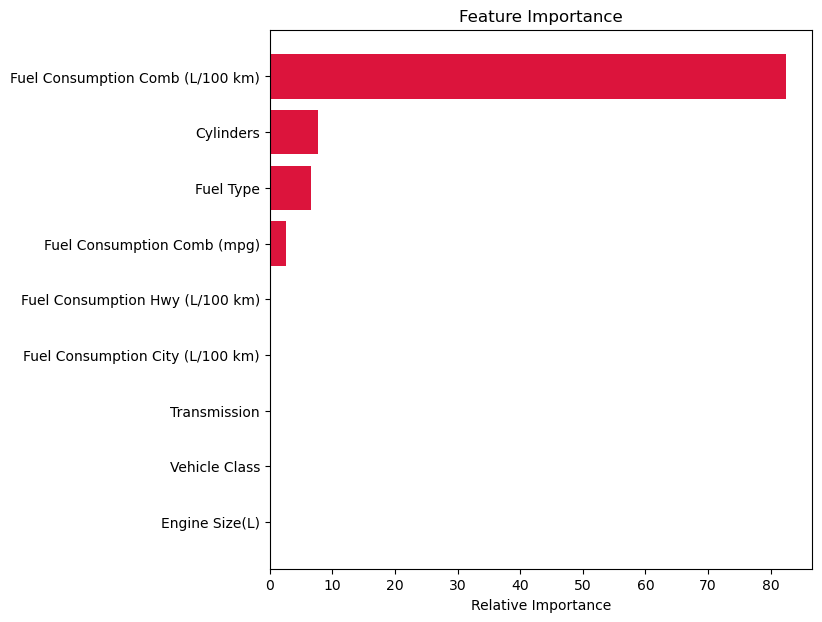

In [49]:
X = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y = df_high['CO2 Emissions(g/km)']  # Target variable
# Importing 'DecisionTreeRegressor'

from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor()  # Instantiating the tree regressor
tr_reg.fit(X, y)                  # Fitting the data

# Calculating the feature importance

feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying feature importance through bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-2][sorted_idx])
plt.show()

In [50]:
# Defining the features and the target of the model

X = df[['Fuel Consumption Comb (L/100 km)', 'Cylinders', 'Fuel Type', 'Fuel Consumption Comb (mpg)']].values # Features 
y = df[['CO2 Emissions(g/km)']].values # Target 

In [51]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [52]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()  # Instantiating the forest
rf_reg.fit(X_train, y_train)     

RandomForestRegressor()

In [53]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9983 

R^2 score for test dataset =  0.9959 

Mean Squared Error train and test: 5.887114569835683 13.586995686247905


Based on the R-squared scores, it seems that the random forest model is performing very well on both the training and test datasets. The R-squared score for the training dataset (0.9983) indicates that the model is able to explain a large portion of the variation in the target variable using the features in the dataset. The R-squared score for the test dataset (0.9959) is also quite high, which suggests that the model is able to generalize well to new, unseen data.

The mean squared error (MSE) for the training dataset (5.887) is lower than the MSE for the test dataset (13.587), which is expected. However, the MSE values are relatively small, indicating that the model is making accurate predictions on both the training and test datasets.

In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining parameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,4,6,10,13, 15, 17,  None],
    'min_samples_split': [2, 5, 6, 8, 10, 15,17,20],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating the random forest regressor
rf_reg = RandomForestRegressor(random_state=3)

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print(grid_search.best_params_)"""

In [54]:
# Retraining the random forest regressor with the best hyperparameters
rf_reg = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [55]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9983 

R^2 score for test dataset =  0.9958 

Mean Squared Error train and test: 5.842181725312405 13.940027545850539


It seems like the hyperparameter tuning did not result in any significant improvement in the performance of the random forest regressor on the high CO2 dataset. The R-squared scores and mean squared errors for the train and test datasets are very similar before and after the hyperparameter tuning.

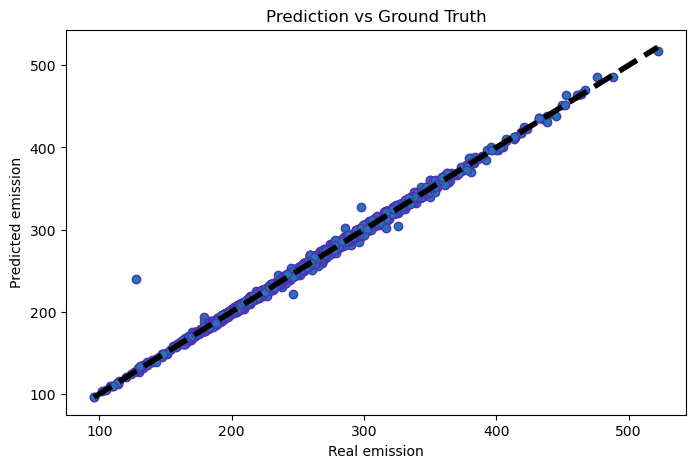

In [56]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### XGBoost Regression

In [57]:
#Importing 'xgboost'

import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor()  

xgb_reg.fit(X_train, y_train)  # Fitting the train data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9984 

R^2 score for test dataset =  0.997 

Mean Squared Error train and test: 5.605686377212859 9.952730400143551


In [ ]:
"""import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
     'learning_rate': [0.1, 0.01, 0.001],
     'max_depth': [3, 5, 7],
     'subsample': [0.8, 1.0],
     'n_estimators': [100, 200, 300]
 }

# Create an XGBoost regressor object
xgb_reg = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print(grid_search.best_params_)"""

In [59]:
import xgboost as xgb

# Create an XGBoost regressor object with the best hyperparameters
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8)

# Fit the model with the training data
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9984 

R^2 score for test dataset =  0.9967 

Mean Squared Error train and test: 5.4872563247837185 11.120903013232809


It looks like both the original XGBoost model and the hyperparameter-tuned model have very good performance on the high CO2 dataset, with R-squared scores above 0.99 for both the training and testing sets. The mean squared error is also relatively low, indicating that the models are making accurate predictions.

It's worth noting that the hyperparameter-tuned model does seem to have a slightly lower MSE for the training set. However, the difference in performance between the two models is not very large, so it's possible that the original model is already very close to optimal for this dataset.

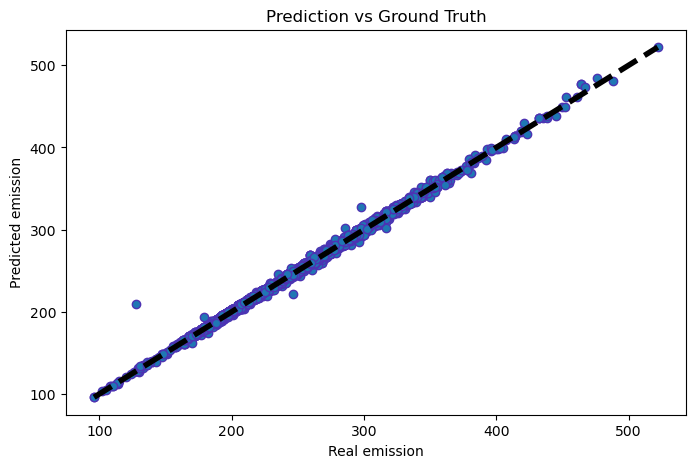

In [61]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### Very High Dataset

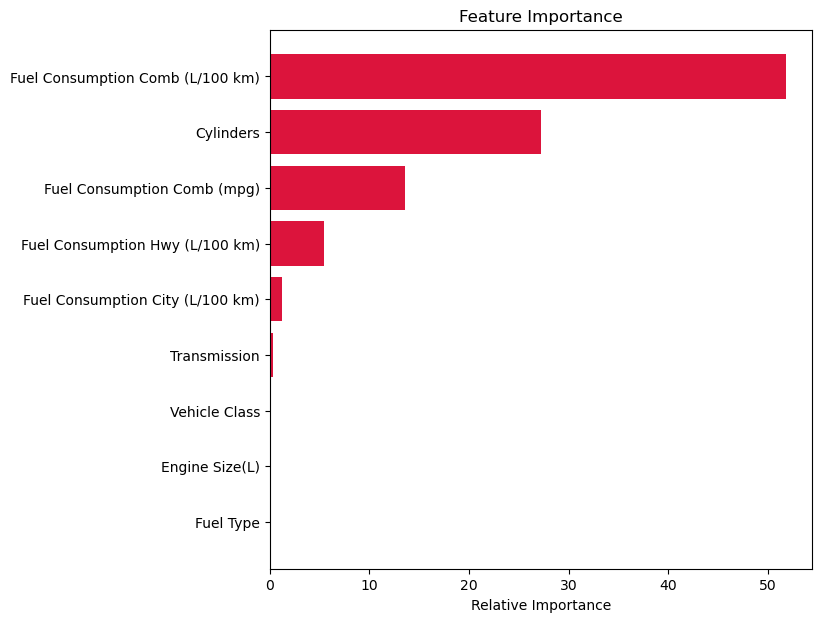

In [62]:
X = df_vhigh.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)  # Features
y = df_vhigh['CO2 Emissions(g/km)']  # Target variable
# Importing 'DecisionTreeRegressor'

from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor()  # Instantiating the tree regressor
tr_reg.fit(X, y)                  # Fitting the data

# Calculating the feature importance

feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying feature importance through bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-2][sorted_idx])
plt.show()

In [66]:
# Defining the features and the target of the model

X = df_vhigh[['Fuel Consumption Comb (L/100 km)', 'Cylinders', 'Fuel Consumption Comb (mpg)','Fuel Consumption Hwy (L/100 km)']].values # Features 
y = df_vhigh[['CO2 Emissions(g/km)']].values

In [67]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [69]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.5456 

R^2 score for test dataset =  0.7362 

Mean Squared Error train and test: 315.46993547569485 271.6978634786017


In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining parameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,4,6,10,13, 15, 17,  None],
    'min_samples_split': [2, 5, 6, 8, 10, 15,17,20],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating the random forest regressor
rf_reg = RandomForestRegressor(random_state=3)

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print(grid_search.best_params_)"""

In [70]:
# Retraining the random forest regressor with the best hyperparameters
rf_reg = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

In [71]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9875 

R^2 score for test dataset =  0.9794 

Mean Squared Error train and test: 8.671360847105527 21.209066903571443


The R-squared score for the training dataset is significantly lower than the R-squared score for the test dataset in the first output for random forest on the very high CO2 dataset. This indicates that the model is underfitting to the training data.

After hyperparameter tuning, there is an improvement in the performance of the model, with a higher R-squared score for the test dataset and a lower mean squared error. However, the R-squared score for the training dataset is still much higher than the R-squared score for the test dataset, which suggests that the model may still be overfitting to the training data.

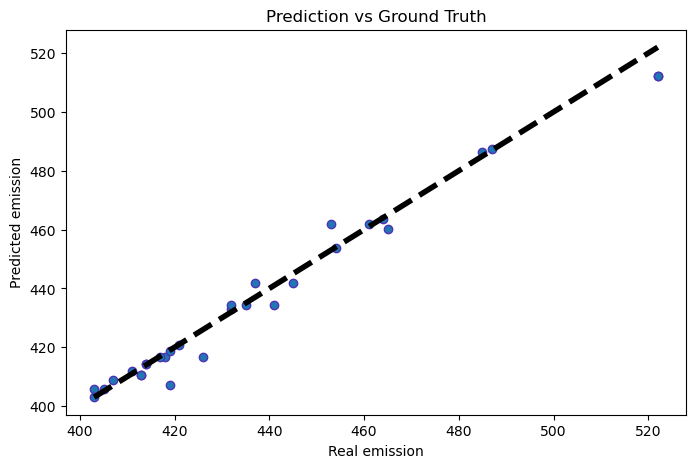

In [72]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

### XGBoost Regression

In [73]:
# Importing 'xgboost'

import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor()  

xgb_reg.fit(X_train, y_train)  # Fitting the train data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9956 

R^2 score for test dataset =  0.9853 

Mean Squared Error train and test: 3.0404437595348366 15.191108451752614


In [ ]:
"""import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
     'max_depth': [3],
     'subsample': [0.8, 1.0],
     'n_estimators': [100, 200, 300]
 }

# Create an XGBoost regressor object
xgb_reg = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print(grid_search.best_params_)"""

In [75]:
import xgboost as xgb

# Create an XGBoost regressor object with the best hyperparameters
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1)

# Fit the model with the training data
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

mse_test = mean_squared_error(y_test, test_y_pred)
mse_train  = mean_squared_error( y_train, train_y_pred)

print("Mean Squared Error train and test:", mse_train, mse_test)

R^2 score for train dataset =  0.9956 

R^2 score for test dataset =  0.984 

Mean Squared Error train and test: 3.0460915271576274 16.492933161618808


The performance metrics for the XGBoost model on the "very high CO2" dataset seem to be consistent with a well-performing model. Both the R^2 scores for the train and test datasets are high, indicating that the model is able to explain a large amount of the variance in the data. Additionally, the mean squared errors for both the train and test datasets are relatively low, which suggests that the model is making accurate predictions.

The slight decrease in performance after hyperparameter tuning is not surprising, as hyperparameter tuning can be a delicate balance between overfitting and underfitting. It's possible that some of the hyperparameters that were adjusted were better suited for the original model, and the changes made during tuning resulted in a slight decrease in performance.

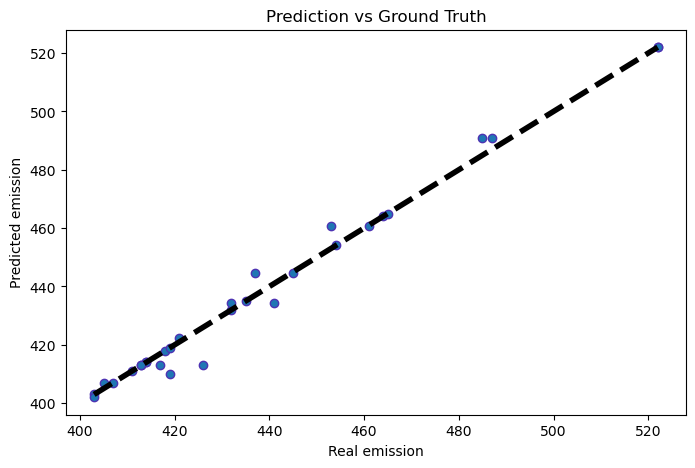

In [77]:
# Let's plot predictions vs ground truth for emission 

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real emission')
ax.set_ylabel('Predicted emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

## Neural Networks

### Low Dataset

First, let us build a simple neural network with a single hidden layer.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X_low = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y_low = df_low['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_low_train_scaled = scaler.fit_transform(X_low_train)
X_low_test_scaled = scaler.transform(X_low_test)

# Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_low_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_low_train_scaled, y_low_train, epochs=50, batch_size=32, verbose=0)

# Predict on training and testing data
y_low_train_pred = model.predict(X_low_train_scaled)
y_low_test_pred = model.predict(X_low_test_scaled)

# Calculate R-squared (R2) score for training and testing data
r2_train_low = r2_score(y_low_train, y_low_train_pred)
r2_test_low = r2_score(y_low_test, y_low_test_pred)

# Calculate mean squared error (MSE) for training and testing data
mse_train_low = mean_squared_error(y_low_train, y_low_train_pred)
mse_test_low = mean_squared_error(y_low_test, y_low_test_pred)

# Print the evaluation metrics
print("Training Set:")
print("R-squared (R2) Score:", r2_train_low)
print("Mean Squared Error (MSE):", mse_train_low)

print("\nTesting Set:")
print("R-squared (R2) Score:", r2_test_low)
print("Mean Squared Error (MSE):", mse_test_low)

1/1 [==============================] - 0s 21ms/step
Training Set:
R-squared (R2) Score: -196.43420125692825
Mean Squared Error (MSE): 12044.469425705593

Testing Set:
R-squared (R2) Score: -273.8792766145856
Mean Squared Error (MSE): 12682.624401578518


The output indicates that the model's performance is not satisfactory, as the R-squared (R2) scores are negative and the mean squared error (MSE) values are very high.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the data
X_low = df_low.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y_low = df_low['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_low_train_scaled = scaler.fit_transform(X_low_train)
X_low_test_scaled = scaler.transform(X_low_test)

# Determine the input dimension based on the number of features
input_dim = X_low_train_scaled.shape[1]

# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(1, activation='relu'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_low_train_scaled, y_low_train, epochs=800, batch_size=20, verbose=0)

# Predict on training and testing data
y_low_train_pred = model.predict(X_low_train_scaled)
y_low_test_pred = model.predict(X_low_test_scaled)

# Calculate R-squared (R2) score for training and testing data
r2_train_low = r2_score(y_low_train, y_low_train_pred)
r2_test_low = r2_score(y_low_test, y_low_test_pred)

# Calculate mean squared error (MSE) for training and testing data
mse_train_low = mean_squared_error(y_low_train, y_low_train_pred)
mse_test_low = mean_squared_error(y_low_test, y_low_test_pred)

# Print the evaluation metrics
print("Training Set:")
print("R-squared (R2) Score:", r2_train_low)
print("Mean Squared Error (MSE):", mse_train_low)

print("\nTesting Set:")
print("R-squared (R2) Score:", r2_test_low)
print("Mean Squared Error (MSE):", mse_test_low)

1/1 [==============================] - 0s 15ms/step
Training Set:
R-squared (R2) Score: 0.9203019135028471
Mean Squared Error (MSE): 4.861980143212466

Testing Set:
R-squared (R2) Score: 0.5072379691632056
Mean Squared Error (MSE): 22.7354925894421


In [35]:
# Save the model
model.save('model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
"""from tensorflow.keras.models import load_model

# Load the model
model = load_model('low_co2_model.h5')
print("Model loaded successfully.")
"""

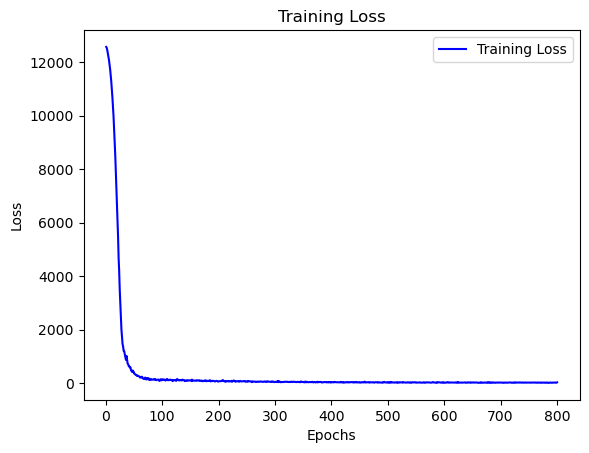

In [36]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the model's history
loss = history.history['loss']
# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Initially, the loss decreases rapidly as the model learns and adjusts its parameters to fit the training data better. This steep decline in the loss represents the initial learning phase of the model. After the initial phase, the loss continues to decrease but at a slower rate. This indicates that the model is still learning and making improvements, but the rate of improvement has slowed down. Eventually, the loss plateaus or levels off. This suggests that the model has converged to a point where further training iterations do not significantly improve the performance.

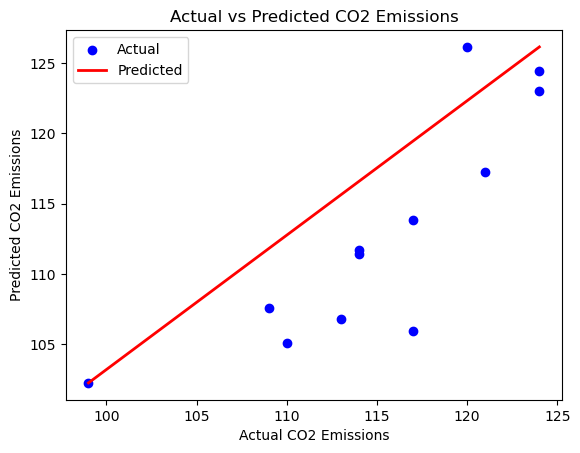

In [37]:
# Plotting the scatter plot with data points and model predictions
plt.scatter(y_low_test, y_low_test_pred, color='blue', label='Actual')
plt.plot([min(y_low_test), max(y_low_test)], [min(y_low_test_pred), max(y_low_test_pred)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()

The above graph indicates that the model doesn't capture the overall trend or pattern, it may indicate that the model is too simple or not complex enough to capture the underlying relationship in the data. In this case, the model may be underfitting, meaning it's not able to learn the patterns and variations present in the data. It could suggest that the model has not been trained enough or the training process was not effective. 

### Average Dataset

In [39]:
# Prepare the data
X_avg = df_avg.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y_avg = df_avg['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_avg_train, X_avg_test, y_avg_train, y_avg_test = train_test_split(X_avg, y_avg, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_avg_train_scaled = scaler.fit_transform(X_avg_train)
X_avg_test_scaled = scaler.transform(X_avg_test)

# Determine the input dimension based on the number of features
input_dim = X_avg_train_scaled.shape[1]

# Build the neural network with L2 regularization
model_avg = Sequential()
model_avg.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.0001)))
model_avg.add(Dropout(0.2))
model_avg.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model_avg.add(Dropout(0.2))
model_avg.add(Dense(1))

# Compile the model_avg
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model_avg.compile(optimizer='adam', loss='mse')

# Train the model_avg
history = model_avg.fit(X_avg_train_scaled, y_avg_train, epochs=800, batch_size=20, verbose=0)

# Predict on training and testing data
y_avg_train_pred = model_avg.predict(X_avg_train_scaled)
y_avg_test_pred = model_avg.predict(X_avg_test_scaled)

# Calculate R-squared (R2) score for training and testing data
r2_train_avg = r2_score(y_avg_train, y_avg_train_pred)
r2_test_avg = r2_score(y_avg_test, y_avg_test_pred)

# Calculate mean squared error (MSE) for training and testing data
mse_train_avg = mean_squared_error(y_avg_train, y_avg_train_pred)
mse_test_avg = mean_squared_error(y_avg_test, y_avg_test_pred)

# Print the evaluation metrics
print("Training Set:")
print("R-squared (R2) Score:", r2_train_avg)
print("Mean Squared Error (MSE):", mse_train_avg)

print("\nTesting Set:")
print("R-squared (R2) Score:", r2_test_avg)
print("Mean Squared Error (MSE):", mse_test_avg)

17/17 [==============================] - 0s 1ms/step
Training Set:
R-squared (R2) Score: 0.9688745138494019
Mean Squared Error (MSE): 13.54604488013376

Testing Set:
R-squared (R2) Score: 0.9689845596141275
Mean Squared Error (MSE): 13.806733869808422


The output indicates that the model performs well on both the training and testing sets. The R-squared (R2) scores are close to 1, which indicates that the model explains a high percentage of the variance in the target variable. Additionally, the mean squared error (MSE) values are relatively low, which suggests that the model's predictions are close to the actual values. 

Overall, these evaluation metrics indicate that the neural network model we have trained is performing well and has good predictive power for the given task. It is capturing the underlying patterns and relationships in the data effectively, resulting in accurate predictions.

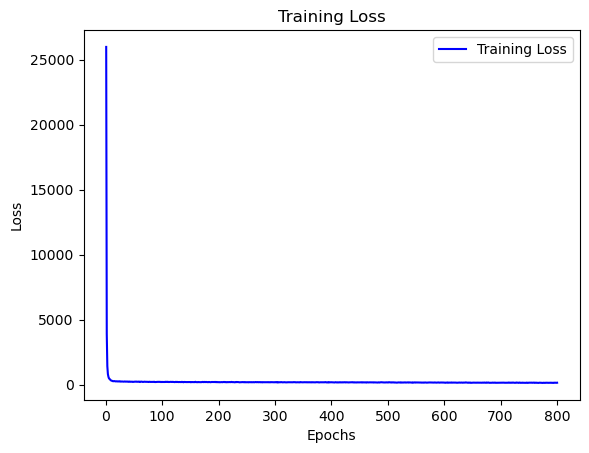

In [40]:
import matplotlib.pyplot as plt

# Get the training loss values
train_loss = history.history['loss']

# Plot the training loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The ideal "L" shaped curve for the training loss demonstrates that the model is learning and improving over the epochs without overfitting. This is a positive indication of a well-trained neural network model.

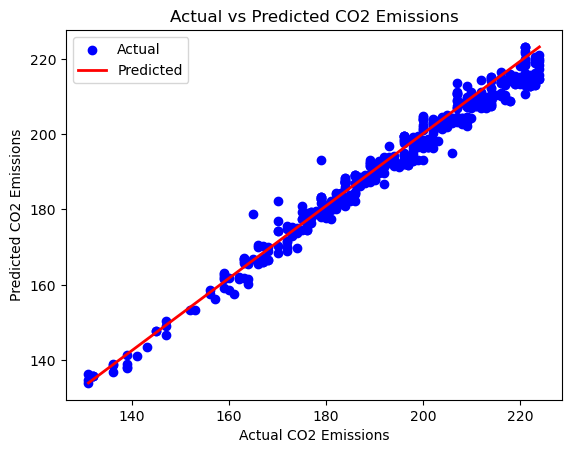

In [41]:
# Plotting the scatter plot with data points and model predictions
plt.scatter(y_avg_test, y_avg_test_pred, color='blue', label='Actual')
plt.plot([min(y_avg_test), max(y_avg_test)], [min(y_avg_test_pred), max(y_avg_test_pred)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()

The line is connecting most of the data points in the scatter plot following the trend and pattern of the data points, indicating that our model is able to capture the underlying relationship between the input features and the target variable well.

### High Dataset

In [42]:
# Prepare the data
X_high = df_high.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y_high = df_high['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_high_train_scaled = scaler.fit_transform(X_high_train)
X_high_test_scaled = scaler.transform(X_high_test)

# Determine the input dimension based on the number of features
input_dim = X_high_train_scaled.shape[1]

# Build the neural network with L2 regularization
model_high = Sequential()
model_high.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.0001)))
model_high.add(Dropout(0.2))
model_high.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model_high.add(Dropout(0.2))
model_high.add(Dense(1))

# Compile the model_high
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model_high.compile(optimizer='adam', loss='mse')

# Train the model_high
history = model_high.fit(X_high_train_scaled, y_high_train, epochs=800, batch_size=20, verbose=0)

# Predict on training and testing data
y_high_train_pred = model_high.predict(X_high_train_scaled)
y_high_test_pred = model_high.predict(X_high_test_scaled)

# Calculate R-squared (R2) score for training and testing data
r2_train_high = r2_score(y_high_train, y_high_train_pred)
r2_test_high = r2_score(y_high_test, y_high_test_pred)

# Calculate mean squared error (MSE) for training and testing data
mse_train_high = mean_squared_error(y_high_train, y_high_train_pred)
mse_test_high = mean_squared_error(y_high_test, y_high_test_pred)

# Print the evaluation metrics
print("Training Set:")
print("R-squared (R2) Score:", r2_train_high)
print("Mean Squared Error (MSE):", mse_train_high)

print("\nTesting Set:")
print("R-squared (R2) Score:", r2_test_high)
print("Mean Squared Error (MSE):", mse_test_high)

29/29 [==============================] - 0s 1ms/step
Training Set:
R-squared (R2) Score: 0.9840320660317106
Mean Squared Error (MSE): 25.35164071085772

Testing Set:
R-squared (R2) Score: 0.9819842564645231
Mean Squared Error (MSE): 28.109575808758795


The high R-squared scores and relatively low MSE values indicate that your neural network model is able to capture the patterns and make accurate predictions for the high CO2 class. 

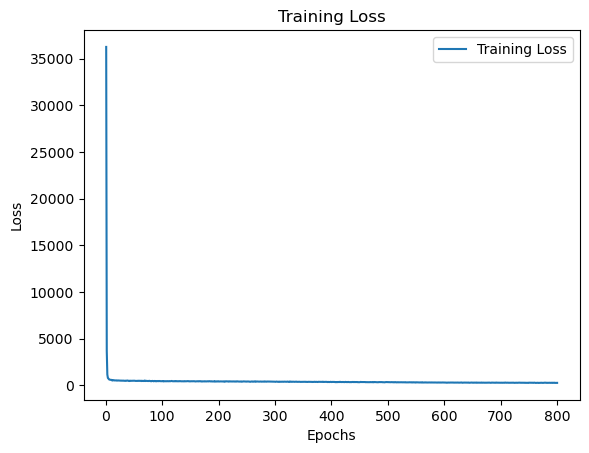

In [43]:
# Access the loss values from the history object
train_loss = history.history['loss']

# Plot the training and validation loss curves
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


The ideal "L" shaped curve for the training loss demonstrates that the model is learning and improving over the epochs without overfitting. This is a positive indication of a well-trained neural network model.

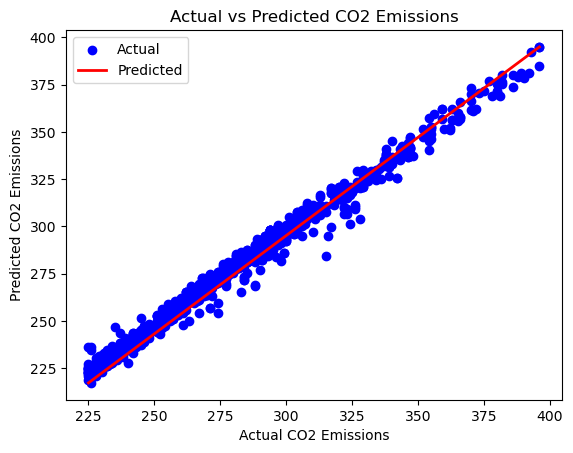

In [44]:
# Plotting the scatter plot with data points and model predictions
plt.scatter(y_high_test, y_high_test_pred, color='blue', label='Actual')
plt.plot([min(y_high_test), max(y_high_test)], [min(y_high_test_pred), max(y_high_test_pred)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()

The line is connecting most of the data points in the scatter plot following the trend and pattern of the data points, indicating that our model is able to capture the underlying relationship between the input features and the target variable well.

### Very High Dataset

In [46]:
# Prepare the data
X_vhigh = df_vhigh.drop(['CO2 Class', 'CO2 Emissions(g/km)'], axis=1)
y_vhigh = df_vhigh['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_vhigh_train, X_vhigh_test, y_vhigh_train, y_vhigh_test = train_test_split(X_vhigh, y_vhigh, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_vhigh_train_scaled = scaler.fit_transform(X_vhigh_train)
X_vhigh_test_scaled = scaler.transform(X_vhigh_test)

# Determine the input dimension based on the number of features
input_dim = X_vhigh_train_scaled.shape[1]

# Build the neural network with L2 regularization
model_vhigh = Sequential()
model_vhigh.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.0001)))
model_vhigh.add(Dropout(0.2))
model_vhigh.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model_vhigh.add(Dropout(0.2))
model_vhigh.add(Dense(1))

# Compile the model_vhigh
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model_vhigh.compile(optimizer='adam', loss='mse')

# Train the model_vhigh
history = model_vhigh.fit(X_vhigh_train_scaled, y_vhigh_train, epochs=800, batch_size=20, verbose=0)

# Predict on training and testing data
y_vhigh_train_pred = model_vhigh.predict(X_vhigh_train_scaled)
y_vhigh_test_pred = model_vhigh.predict(X_vhigh_test_scaled)

# Calculate R-squared (R2) score for training and testing data
r2_train_vhigh = r2_score(y_vhigh_train, y_vhigh_train_pred)
r2_test_vhigh = r2_score(y_vhigh_test, y_vhigh_test_pred)

# Calculate mean squared error (MSE) for training and testing data
mse_train_vhigh = mean_squared_error(y_vhigh_train, y_vhigh_train_pred)
mse_test_vhigh = mean_squared_error(y_vhigh_test, y_vhigh_test_pred)

# Print the evaluation metrics
print("Training Set:")
print("R-squared (R2) Score:", r2_train_vhigh)
print("Mean Squared Error (MSE):", mse_train_vhigh)

print("\nTesting Set:")
print("R-squared (R2) Score:", r2_test_vhigh)
print("Mean Squared Error (MSE):", mse_test_vhigh)

1/1 [==============================] - 0s 16ms/step
Training Set:
R-squared (R2) Score: 0.906249692283573
Mean Squared Error (MSE): 77.23627730437482

Testing Set:
R-squared (R2) Score: 0.6077397400447472
Mean Squared Error (MSE): 292.50455324603246


The model performs well on the training data with a high R-squared score and relatively low MSE. However, there seems to be some level of overfitting, as the model's performance on the testing data is not as strong, indicated by a lower R-squared score and higher MSE. 

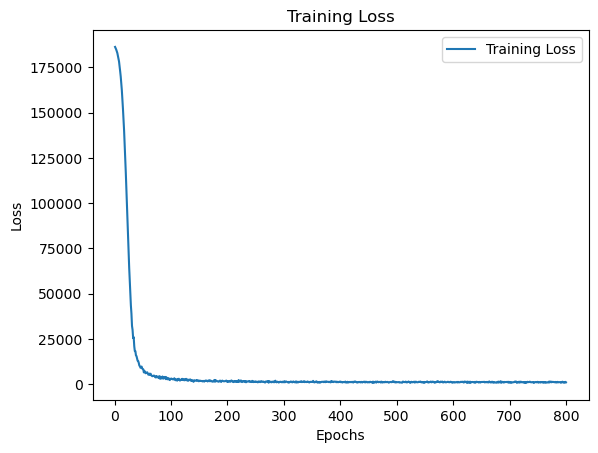

In [47]:
# Access the loss values from the history object
train_loss = history.history['loss']

# Plot the training and validation loss curves
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Initially, the loss decreases rapidly as the model learns and adjusts its parameters to fit the training data better. This steep decline in the loss represents the initial learning phase of the model. After the initial phase, the loss continues to decrease but at a slower rate. This indicates that the model is still learning and making improvements, but the rate of improvement has slowed down. Eventually, the loss plateaus or levels off. This suggests that the model has converged to a point where further training iterations do not significantly improve the performance.

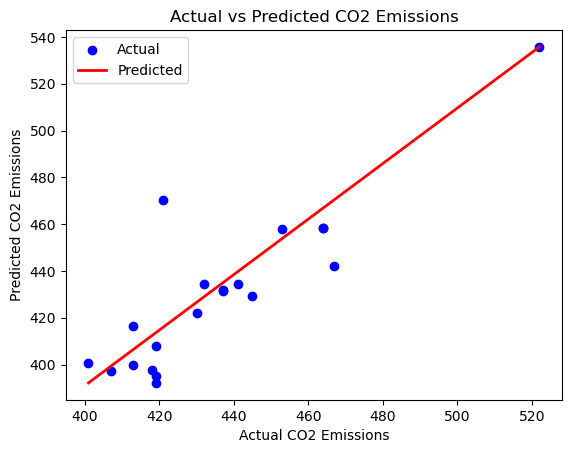

In [48]:
# Plotting the scatter plot with data points and model predictions
plt.scatter(y_vhigh_test, y_vhigh_test_pred, color='blue', label='Actual')
plt.plot([min(y_vhigh_test), max(y_vhigh_test)], [min(y_vhigh_test_pred), max(y_vhigh_test_pred)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()

The above graph indicates that the model doesn't capture the overall trend or pattern, it may indicate that the model is too simple or not complex enough to capture the underlying relationship in the data. In this case, the model may be underfitting, meaning it's not able to learn the patterns and variations present in the data. It could suggest that the model has not been trained enough or the training process was not effective.

## CONCLUSION

### LOW Dataset Results

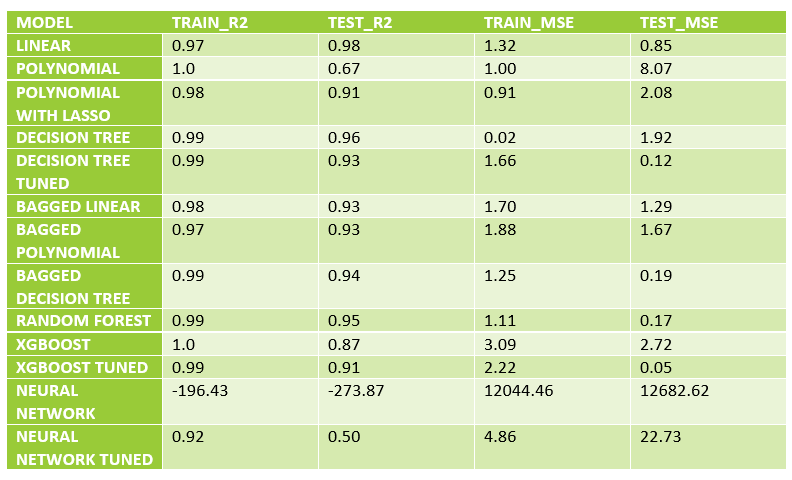

After checking the results, we can identify that the Random Forest, Decision Tree Regressor, XGBoost, tuned XGBoost and Bagged Regressor with Linear, Polynomial Regression and Decision Tree as base estimator models are performing well. These models have high R2 values close to 1, which indicate a good fit of the model to the data, and low MSE values close to 0, which indicate that the model has small errors in the predictions. The neural network models do not perform as well as the other models, with negative R2 values and high MSE values, indicating poor performance.

### AVERAGE Dataset Results

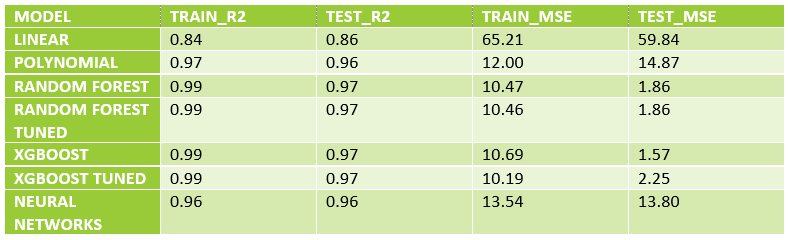

Based on the results for the average CO2 dataset, the best models for predicting CO2 levels are Random Forest, Random Forest tuned, XGBoost, and XGBoost tuned, as they all have high R^2 scores for both the train and test datasets and low MSE values for the test dataset. The neural network model also has a relatively high R^2 score but a higher MSE value, indicating it may not perform as well as the other models. The linear and polynomial models have lower R^2 scores and higher MSE values, indicating they may not be as effective in predicting CO2 levels for this dataset.

### HIGH Dataset Results

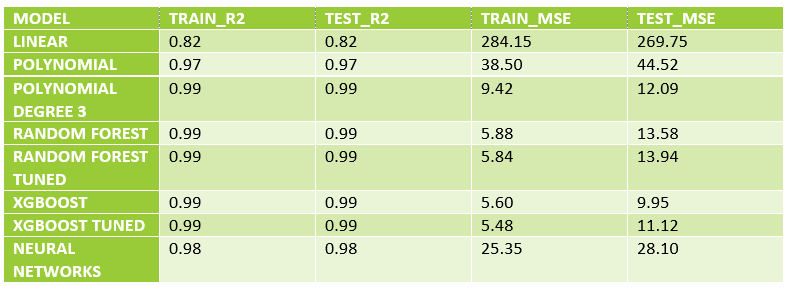

Based on these results, it seems that Random Forest, XGBoost, and Polynomial Regression with degree 3 are all good models for predicting CO2 levels in the high class. Random Forest (both regular and tuned) achieved high R2 scores of 0.99 on both train and test datasets, with low mean squared errors. XGBoost (both regular and tuned) also achieved similar high R2 scores of 0.99 on both train and test datasets, with even lower mean squared errors for the regular model. Polynomial Regression with degree 3 achieved a high R2 score of 0.99 on both train and test datasets, with a relatively low mean squared error.

### VERY HIGH Dataset Results

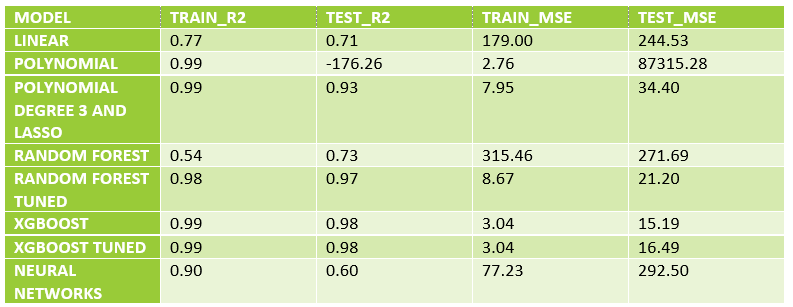

Based on the results, it appears that the XGBoost model (both the standard and tuned versions) performed the best on the very high CO2 dataset, with the highest R2 scores and lowest mean squared errors. The polynomial model with degree 3 and Lasso regularization also performed well with high R2 scores and relatively low mean squared errors. The other models (linear, polynomial, random forest, and neural networks) did not perform as well on this dataset. It's worth noting that the neural network model had a significantly lower R2 score and higher mean squared error compared to the other models.

References:

* Canada Gazette &ndash; Regulations Amending the Passenger Automobile and Light Truck Greenhouse Gas Emission Regulations. (n.d.). Canada Gazette &Ndash; Regulations Amending the Passenger Automobile and Light Truck Greenhouse Gas Emission Regulations. https://gazette.gc.ca/rp-pr/p2/2014/2014-10-08/html/sor-dors207-eng.html